In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from sklearn import manifold, preprocessing
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
import warnings

In [2]:
work_dir = os.path.expanduser('~/Google_Drive/olson_lab/projects/relationship_knowledge/surveys/lit_dimensions_all_relationships')
output_dir = work_dir+'/results'
os.chdir(work_dir)

In [3]:
# Grab the qualtrics output
qual_output = [i for i in os.listdir('./') if i.startswith('RK')][0]

# Prep responses and key
raw = pd.read_csv(qual_output)
raw_reorg = raw.drop(axis='index',index=[0,1])
raw_reorg['subject'] = list(raw_reorg.index)
raw_reorg = raw_reorg.reset_index(drop=True)
raw_reorg['Duration (in seconds)'] = pd.to_numeric(raw_reorg['Duration (in seconds)'])
key = pd.read_csv('qualtrics_question_key.csv')

responses = raw_reorg
responses['subject'] = list(raw_reorg.index)
responses = responses.loc[:, responses.columns.str.startswith('Q')]
responses = responses[responses.columns[1:-7]]

# Get total number of responses
print("Total number of responses from qualtrics - "+str(len(responses)))

warnings.filterwarnings('ignore')

/Users/haroonpopal/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (4,5,6,9,10,11,12,13,14,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,

Total number of responses from qualtrics - 1065


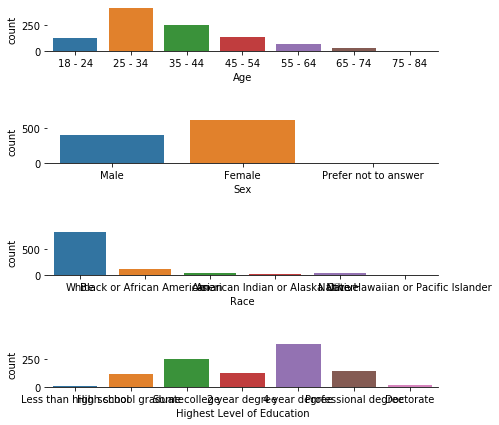

In [4]:
# Demographics
demo_orig = pd.read_csv(qual_output, header=1, 
                           usecols=range(len(raw_reorg.iloc[0])-9,
                                         len(raw_reorg.iloc[0])-1))
demo_orig = demo_orig.drop(axis='index',index=0)
demographics = demo_orig
#demographics = demographics.drop(axis='index',index=0)


# Plot demographic information
# Set up the matplotlib figure
#sns.set(font_scale=1.2)
#sns.set_style("whitegrid")
f, axes = plt.subplots(4, 1, figsize=(7, 7), sharex=False)
f.subplots_adjust(wspace = 10, hspace=1.5)
sns.despine(left=True)
sns.countplot(demographics['Age'], ax=axes[0], order=['18 - 24', '25 - 34',
                                                      '35 - 44', '45 - 54',
                                                      '55 - 64', '65 - 74',
                                                      '75 - 84'])
sns.countplot(demographics['Sex'], ax=axes[1])
sns.countplot(demographics['Race'], ax=axes[2])
sns.countplot(demographics['Highest Level of Education'], ax=axes[3],
              order=['Less than high school', 'High school graduate',
                     'Some college', '2 year degree', '4 year degree',
                     'Professional degree','Doctorate'])


***
### Create a dictionary that will store dataframes for each dimensions
### Dataframes have ratings all relationships

In [5]:
filter_col = [col for col in raw if col.startswith('Q8.2')]
#relationships = [x for x in raw.iloc[0].tolist() if x.startswith('Q8.2')]
#relationships = [x for x in raw.columns.tolist() if x.startswith('Q8.2')]
relationships = raw[filter_col].iloc[0]
relationships = [s.replace('\xe2\x80\x93', '-') for s in relationships]
relationships = [i.split(' - ', 1)[1] for i in relationships]
dimension_frames = {}
count=2
for dim in key['dimension'].tolist()[2:-3]:  # exclude foil and demographics
    filtered_cols = [col for col in raw_reorg if col.startswith('Q'+str(key['block'].iloc[count])+'.2')]
    dimension_frames[dim] = pd.DataFrame(responses[filtered_cols])
    dimension_frames[dim].columns = relationships
    # Delete all data for "between cousins" and only keep "second cousins"
    #dimension_frames[dim]['Between second cousins'].iloc[:629] = np.nan
    count=count+1


### Check total number of responses for each word before and after removing bad participants
Foil questions were used to catch participants who were not paying attention or taking the survey seriously

No handles with labels found to put in legend.
No handles with labels found to put in legend.


10
28
Total number of responses, excluding bad participants - 817


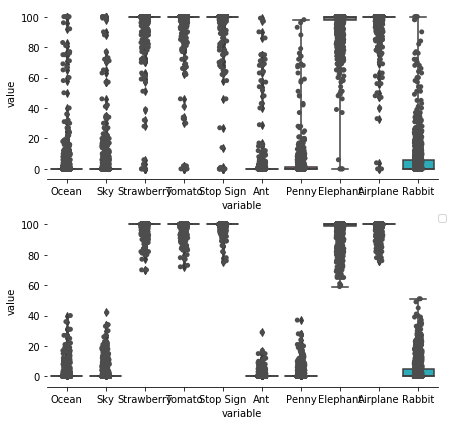

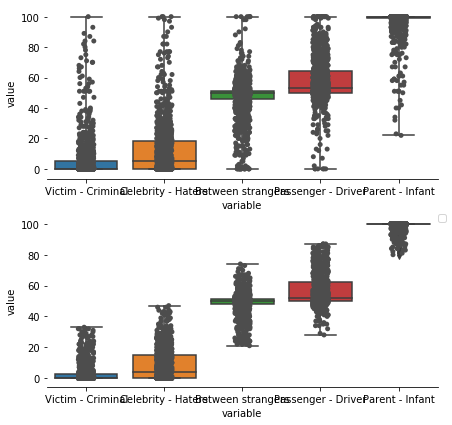

In [6]:
# Check total number of responses for each word
num_response = []
for col in dimension_frames['Coercion'].columns:
    num_response.append(dimension_frames['Coercion'][col].count())
#plt.figure()
#sns.barplot(x=relationships,y=num_response)


# Check color foils to exclude people
foil_items = [x for x in raw.columns.tolist() if x.startswith('Q2.1')]
foil_items = foil_items + [x for x in raw.columns.tolist() if x.startswith('Q35.1')]
foil_items = raw[foil_items].iloc[0]
foil_items = [s.replace('\xe2\x80\x93', '-') for s in foil_items]
foil_items = [i.split(' - ', 1)[1] for i in foil_items]
filtered_cols = [col for col in raw_reorg if col.startswith(('Q2.1','Q35.1'))]
foils_color_size = pd.DataFrame(responses[filtered_cols])
foils_color_size.columns = foil_items
foils_color_size['MTurkCode']  =raw_reorg['MTurkCode']
foils_color_size = foils_color_size.apply(pd.to_numeric)
"""foils = all_resp_melt.loc[all_resp_melt['word'].isin(['Movie','Fire','Jackpot',
                                                      'Deathbed','Car'])]
foils_melt = all_resp_melt.loc[all_resp_melt['word'].isin(['Movie','Fire','Jackpot',
                                                      'Deathbed','Car'])]"""
foils_color_size_melt = pd.melt(foils_color_size, id_vars='MTurkCode')

# Check for values above means for unexpected foils
outliers_color_size_list = []
for col in foils_color_size.columns[:-1]:
    outliers_color_size_list = outliers_color_size_list + list(foils_color_size[(foils_color_size[col] > 
                   foils_color_size[col].mean()+foils_color_size[col].std()*3.5) |
                   (foils_color_size[col] < 
                    foils_color_size[col].mean()-foils_color_size[col].std()*3.5)].index)
outliers_color_size_list = set(outliers_color_size_list)


# Remove outliers based on assumptions of words
# Frequency of deathbed > car
# Removing subjects based on completetion time is not the best (they do okay)
foil_color_size_outliers = foils_color_size
foil_color_size_outliers = foil_color_size_outliers[~foil_color_size_outliers.index.isin(outliers_color_size_list)]
foil_color_size_outliers_melt = pd.melt(foil_color_size_outliers, id_vars='MTurkCode')

#foil_outliers = foils[~foils.index.isin(outliers_list)]

f, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=False)
sns.despine(left=True)
sns.stripplot(x="variable", y="value", data=foils_color_size_melt, 
              color='.3', jitter=True, ax=axes[0])
#axes[0].legend_.remove()
sns.stripplot(x="variable", y="value", data=foil_color_size_outliers_melt, 
              color='.3', jitter=True,  ax=axes[1])
sns.boxplot(x="variable", y="value", data=foils_color_size_melt, whis=np.inf, ax=axes[0])
sns.boxplot(x="variable", y="value", data=foil_color_size_outliers_melt, whis=np.inf, ax=axes[1])
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.0)


# Get MTurk codes for outliers
outliers_foil_df = foils_color_size.iloc[list(outliers_color_size_list)]
outliers_df = raw_reorg.iloc[list(outliers_color_size_list)]
outliers_df.to_csv('exclusion_list.csv')


# Check foils to see if any subjs responded indiscriminately
foil_relationships = [x for x in raw.iloc[0].tolist() if x.startswith('Q34')]
foil_relationships = [x[6:] for x in foil_relationships]
foil_relationships = [x for x in raw.columns.tolist() if x.startswith('Q34.1')]
foil_relationships = raw[foil_relationships].iloc[0]
foil_relationships = [s.replace('\xe2\x80\x93', '-') for s in foil_relationships]
foil_relationships = [i.split(' - ', 1)[1] for i in foil_relationships]
filtered_cols = [col for col in raw_reorg if col.startswith('Q34.1')]
foils = pd.DataFrame(responses[filtered_cols])
foils.columns = foil_relationships
foils['MTurkCode']  =raw_reorg['MTurkCode']
foils = foils.apply(pd.to_numeric)
foils_melt = pd.melt(foils, id_vars='MTurkCode')

# Check for values above means for unexpected foils
outliers_list = []
for rel in foils.columns[:-1]:
    outliers_list = outliers_list + list(foils[(foils[rel] > 
                   foils[rel].mean()+foils[rel].std()*2) |
                   (foils[rel] < 
                    foils[rel].mean()-foils[rel].std()*2)].index)
outliers_list = set(outliers_list)



# Remove outliers based on assumptions of words
# Frequency of deathbed > car
# Removing subjects based on completetion time is not the best (they do okay)
foil_outliers = foils
foil_outliers = foil_outliers[~foil_outliers.index.isin(outliers_list)]
foil_outliers_melt = pd.melt(foil_outliers, id_vars='MTurkCode')

#foil_outliers = foils[~foils.index.isin(outliers_list)]

f, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=False)
sns.despine(left=True)
sns.stripplot(x="variable", y="value", data=foils_melt, 
              color='.3', jitter=True, ax=axes[0])
#axes[0].legend_.remove()
sns.stripplot(x="variable", y="value", data=foil_outliers_melt, 
              color='.3', jitter=True,  ax=axes[1])
sns.boxplot(x="variable", y="value", data=foils_melt, whis=np.inf, ax=axes[0])
sns.boxplot(x="variable", y="value", data=foil_outliers_melt, whis=np.inf, ax=axes[1])
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.0)



# Remove relationship ratings where subjects indicated that they did not 
    # understand the relationships
filtered_cols = [col for col in raw_reorg if col.startswith(('Q3.1'))]
familiarity = pd.DataFrame(raw_reorg[filtered_cols])
familiarity.columns = relationships
familiarity['MTurkCode'] = raw_reorg['MTurkCode']
familiarity = familiarity.apply(pd.to_numeric)


familiarity_melt = pd.melt(familiarity, id_vars='MTurkCode')

# Check for values above means for unexpected foils
familiarity_list = []
for col in familiarity.columns[:-1]:
    familiarity_list = familiarity_list + list(familiarity[(familiarity[col] > 
                   familiarity[col].mean()+familiarity[col].std()*3.5) |
                   (familiarity[col] < 
                    familiarity[col].mean()-familiarity[col].std()*3.5)].index)
familiarity_list = set(familiarity_list)


# Remove outliers from the rest of the data
outliers_all_list = set(list(outliers_list) + list(outliers_color_size_list) + list(familiarity_list))
dimension_frames_outliers = dimension_frames.copy()
for dim in dimension_frames_outliers:
    dimension_frames_outliers[dim] = dimension_frames[dim][~dimension_frames[dim].index.isin(outliers_all_list)]
    dimension_frames_outliers[dim] = dimension_frames_outliers[dim].apply(pd.to_numeric)




# Check total number of responses for each word with outliers excluded
num_response = []
for col in dimension_frames_outliers['Coercion'].columns:
    num_response.append(dimension_frames_outliers['Coercion'][col].count())



count_dim_rel = pd.DataFrame(columns=dimension_frames_outliers.keys())
for dim in dimension_frames_outliers.keys():
        count_dim_rel[dim] = dimension_frames_outliers[dim].count()
print(min(count_dim_rel[dim]))
print(max(count_dim_rel[dim]))
print("Total number of responses, excluding bad participants - "+str(len(dimension_frames_outliers[dim])))


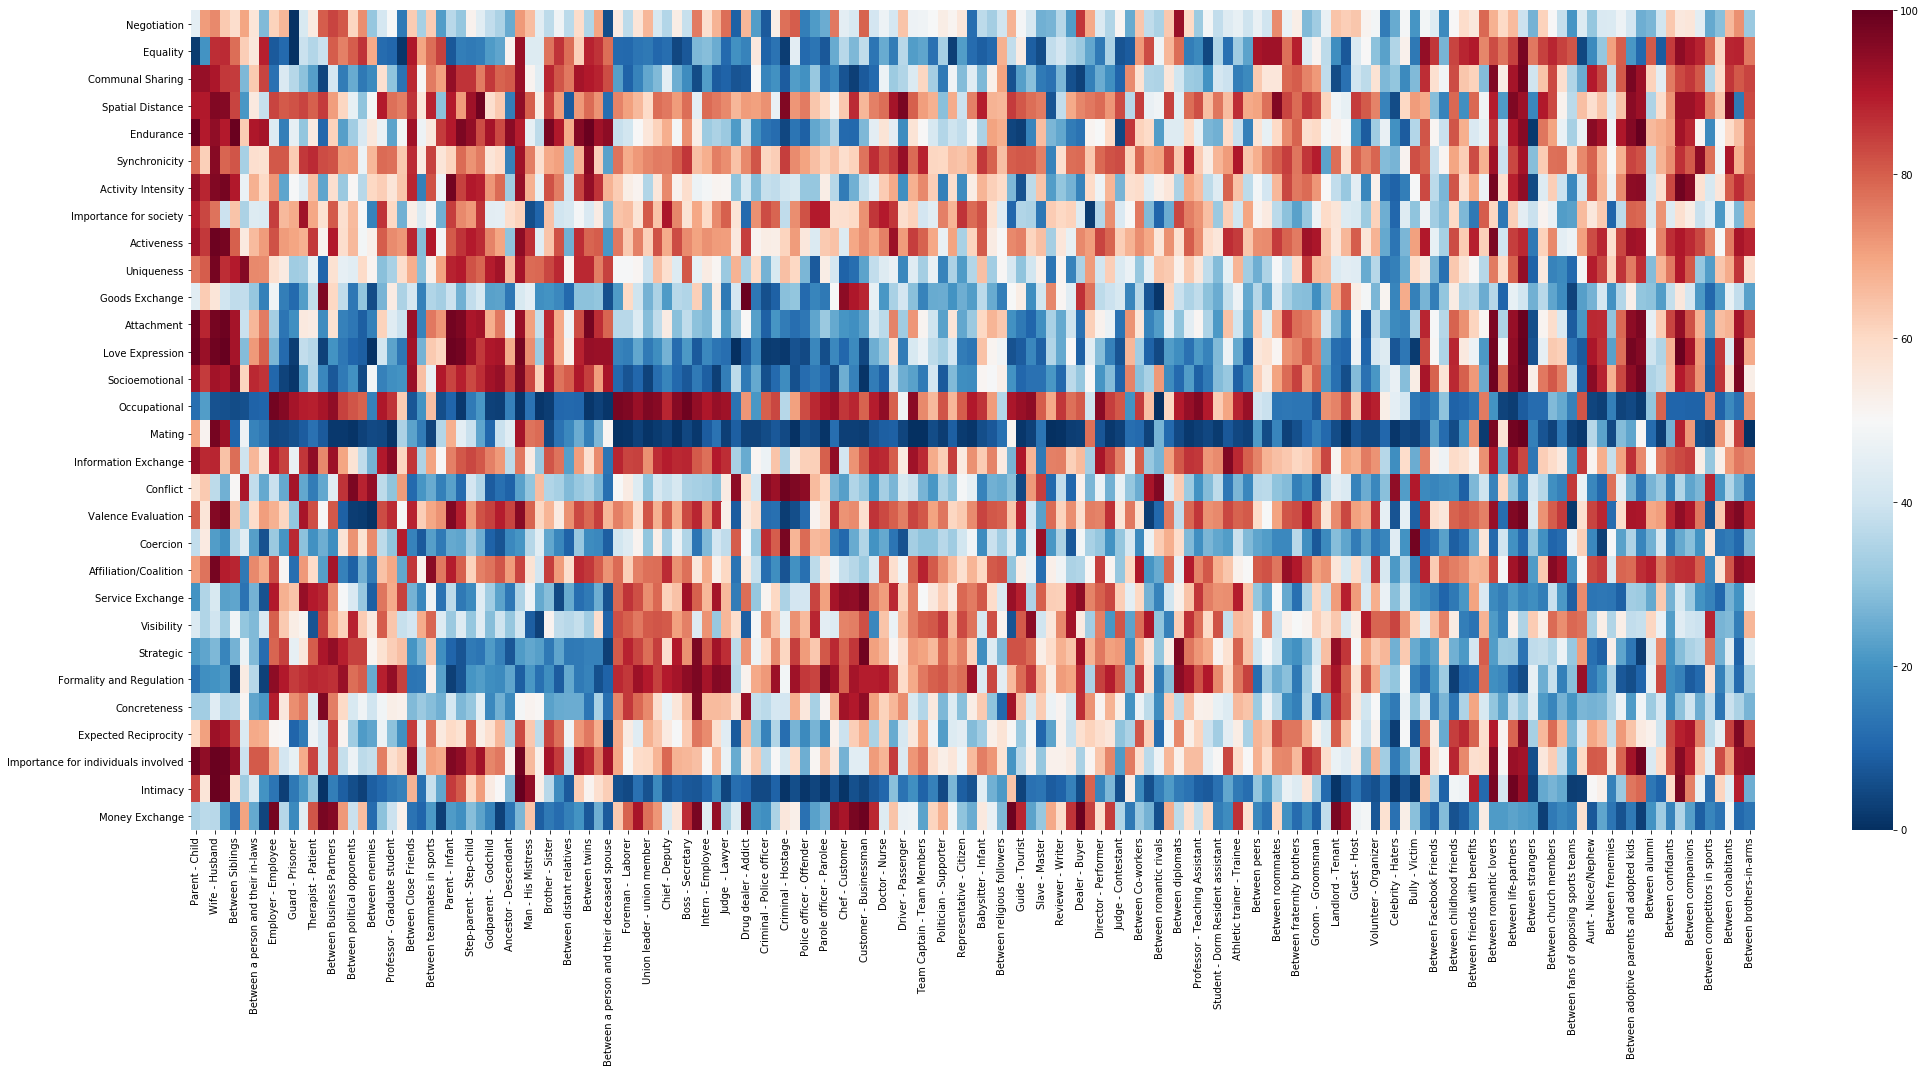

In [9]:
dim_rel = pd.DataFrame(columns=relationships)
count=0
col_names = []
for dim in dimension_frames_outliers.keys():
    dim_rel.loc[count] = dimension_frames_outliers[dim].mean().tolist()
    col_names.append(dim)
    count = count + 1
dim_rel.index = dimension_frames_outliers.keys()

dim_rel.to_csv(output_dir+'/dim_rel.csv')

#ax = sns.heatmap(dim_rel)
plt.figure(figsize=(30,15))
heatmap = sns.heatmap(dim_rel, center=50,cmap="RdBu_r")
fig = heatmap.get_figure()
plt.tight_layout()
fig.savefig(output_dir+'/dim_rel_heatmap.png')





# Principal Component Analysis

In [10]:
dim_rel_scaled = preprocessing.scale(dim_rel.transpose())
dim_rel_scaled_df = pd.DataFrame(dim_rel_scaled, index=dim_rel.columns,
                                 columns=dim_rel.index)
dim_rel_scaled_df.to_csv(output_dir+'/dim_rel_scaled.csv')

# Create PCA object and fit
#   Do all the PCA math like calculate loading scores and the variation of each component
pca = PCA()
pca.fit(dim_rel_scaled)

# Generate coordinates
pca_data = pca.transform(dim_rel_scaled)

## Scree plot
Calculate % of variance that each component accounts for

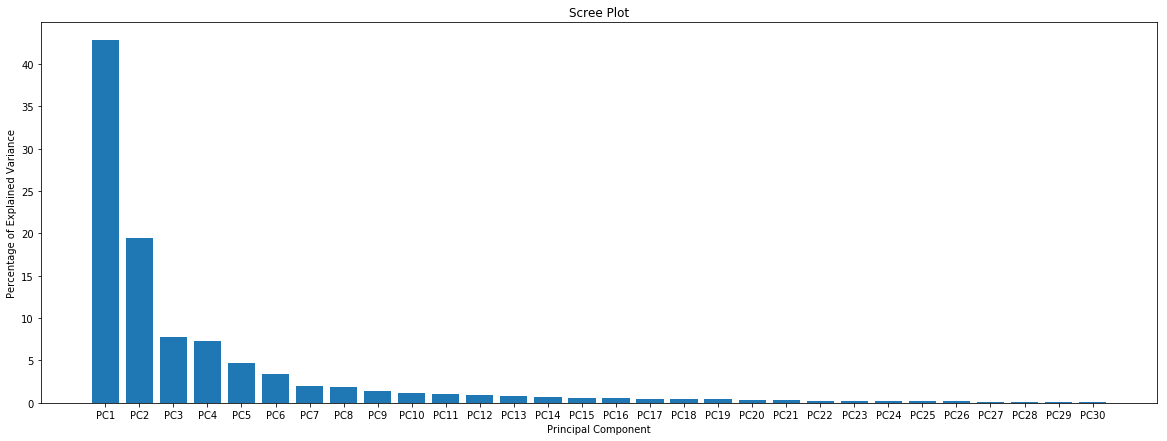

<Figure size 432x288 with 0 Axes>

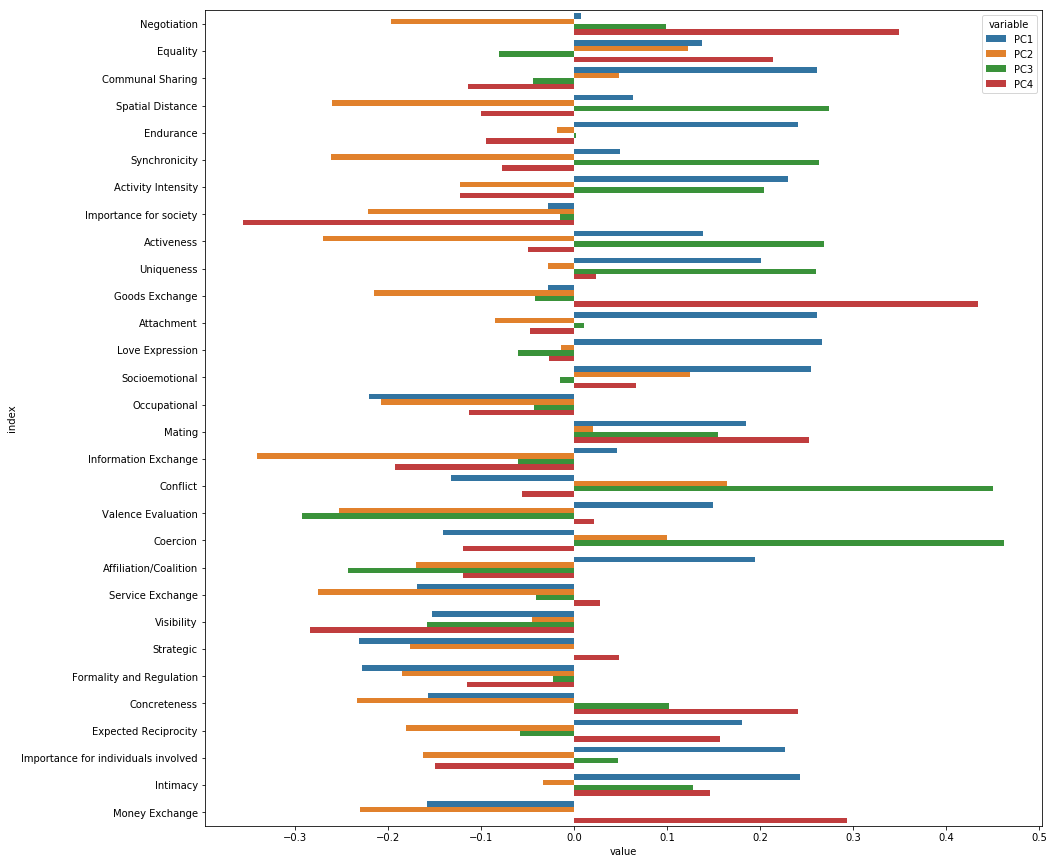

In [11]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize=(20,7))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
plt.savefig(output_dir+'/pca_screeplot.png')

pca_df = pd.DataFrame(pca_data, columns=labels, index=relationships)


# Look at the loading scores
loading_scores = pd.DataFrame(pca.components_.T, columns=pca_df.columns, index=dimension_frames_outliers.keys())
#loading_scores_sorted = loading_scores.abs().sort_values(ascending=False)
#loading_scores['Order'] = [25, 11, 14, 9, 2, 8, 5, 18, 1, 17, 16, 24, 6, 15, 
#                           19, 23, 20, 12, 3, 4, 7, 21, 10, 22, 13]
#loading_scores = loading_scores.sort_values(['Order'])
loading_scores.to_csv(output_dir+'/pca_loading_scores.csv')


#reorder = [14,12,7,8,13,9,3,5,4,23,24,21,19,20,17]
#loading_scores_reorder = loading_scores
#loading_scores_reorder = loading_scores.sort_values(['PC1','PC2','PC3'])
#loading_scores_reorder['Order'] = [11,9,6,7,10,8,2,4,3,23,24,20,16,17,14,21,12,15,18,22,19,1,0,5,13]
#loading_scores_reorder = loading_scores.sort_values(['Order'])
#pca_plot_data = pd.melt(loading_scores_reorder[['PC1','PC2','PC3']].reset_index(), id_vars='index')
pca_plot_data = pd.melt(loading_scores[['PC1','PC2','PC3','PC4']].reset_index(), id_vars='index')

plt.figure(figsize=(15,15))
sns.barplot(x='value', y='index', hue='variable', data=pca_plot_data)
plt.savefig(output_dir+'/pca_loadings.png')


## Selectively labeled scatter plots

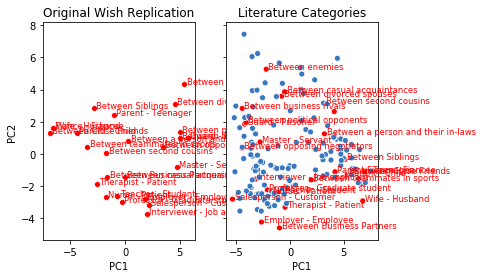

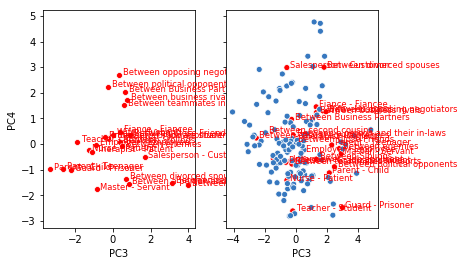

In [12]:
rel_names_reformat = pca_df.index.map(lambda x: x.lstrip('Between '))


survey_1_rel = relationships[:26]
survey_1_rel.remove('Between cousins')
pca_df_filtered = pca_df.loc[survey_1_rel]
pca_df['plot1'] = 0
pca_df.iloc[0:25,-1] = 1

survey_1_pca_df = pd.read_csv('../wish_replication/results/pca_relationships.csv',
                              index_col=0)
survey_1_pca_df['PC1'] = survey_1_pca_df['PC1']*-1

#p1 = sns.scatterplot(x="PC1", y="PC2", hue='plot1', data=pca_df, 
#                     palette = sns.color_palette(palette = [sns.xkcd_rgb["windows blue"] , "red"]))
#for line in range(0,pca_df_filtered.shape[0]):
#     p1.text(pca_df_filtered.PC1[line]+0.2, pca_df_filtered.PC2[line], pca_df_filtered.index[line],
#             horizontalalignment='left', size='small', color='red')
#p1.savefig(output_dir+'/pca_scatter_pc1_pc2_comparison.png')


fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
p1 = sns.scatterplot(x="PC1", y="PC2", data=survey_1_pca_df, ax=ax1,
                     color=["red"])
p2 = sns.scatterplot(x="PC1", y="PC2", hue='plot1', data=pca_df, ax=ax2,
                     palette = sns.color_palette(palette = [sns.xkcd_rgb["windows blue"] , "red"]),
                     legend=False)
for line in range(0,survey_1_pca_df.shape[0]):
    p1.text(survey_1_pca_df.PC1[line]+0.2, survey_1_pca_df.PC2[line], survey_1_pca_df.index[line],
             horizontalalignment='left', size='small', color='red') 
    p2.text(pca_df_filtered.PC1[line]+0.2, pca_df_filtered.PC2[line], pca_df_filtered.index[line],
             horizontalalignment='left', size='small', color='red')
ax1.title.set_text('Original Wish Replication')
ax2.title.set_text('Literature Categories')


fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
p3 = sns.scatterplot(x="PC3", y="PC4", data=survey_1_pca_df, ax=ax1,
                     color=["red"])
p4 = sns.scatterplot(x="PC3", y="PC4", hue='plot1', data=pca_df, ax=ax2,
                     palette = sns.color_palette(palette = [sns.xkcd_rgb["windows blue"] , "red"]),
                     legend=False)
for line in range(0,survey_1_pca_df.shape[0]):
    p3.text(survey_1_pca_df.PC3[line]+0.2, survey_1_pca_df.PC4[line], survey_1_pca_df.index[line],
             horizontalalignment='left', size='small', color='red') 
    p4.text(pca_df_filtered.PC3[line]+0.2, pca_df_filtered.PC4[line], pca_df_filtered.index[line],
             horizontalalignment='left', size='small', color='red')



## PCA graphs

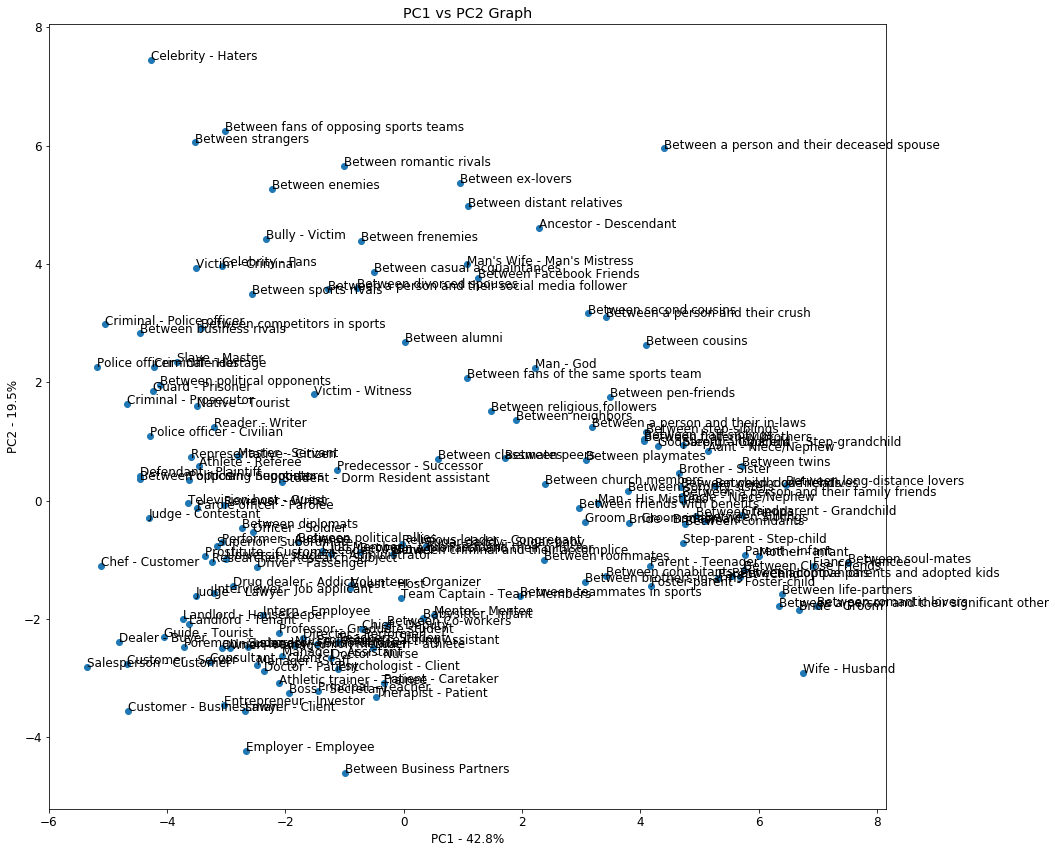

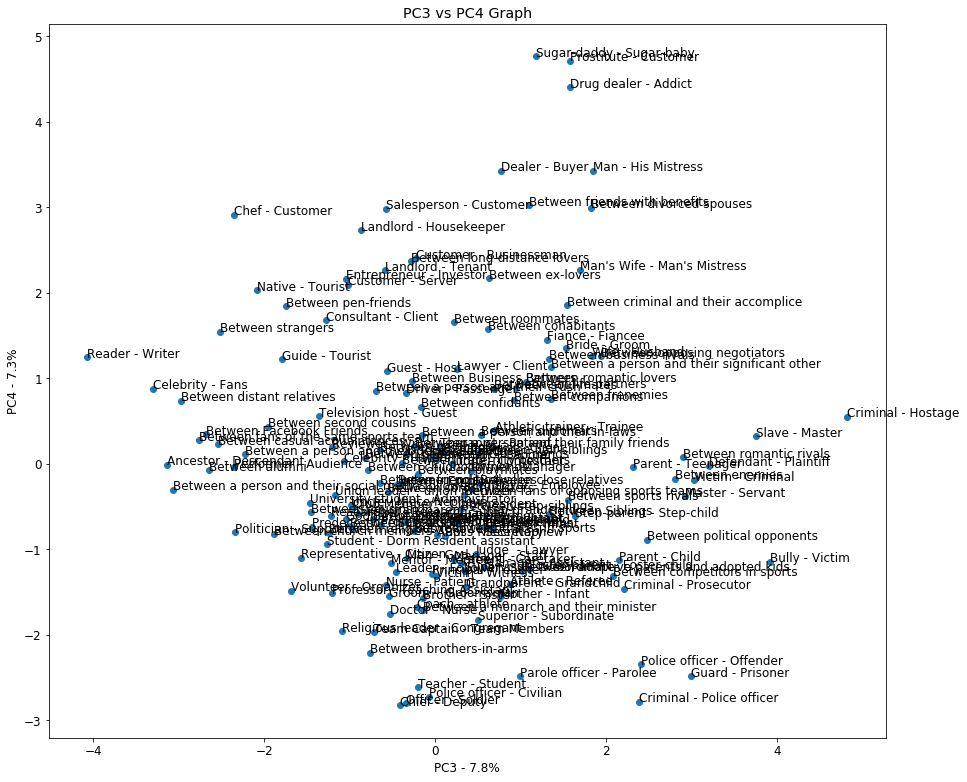

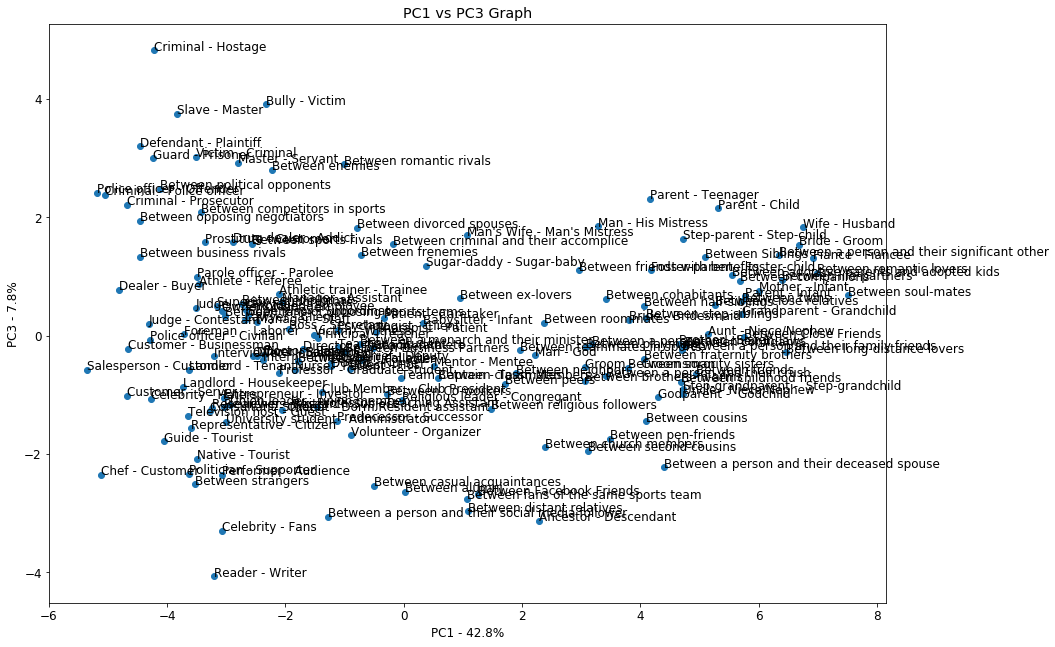

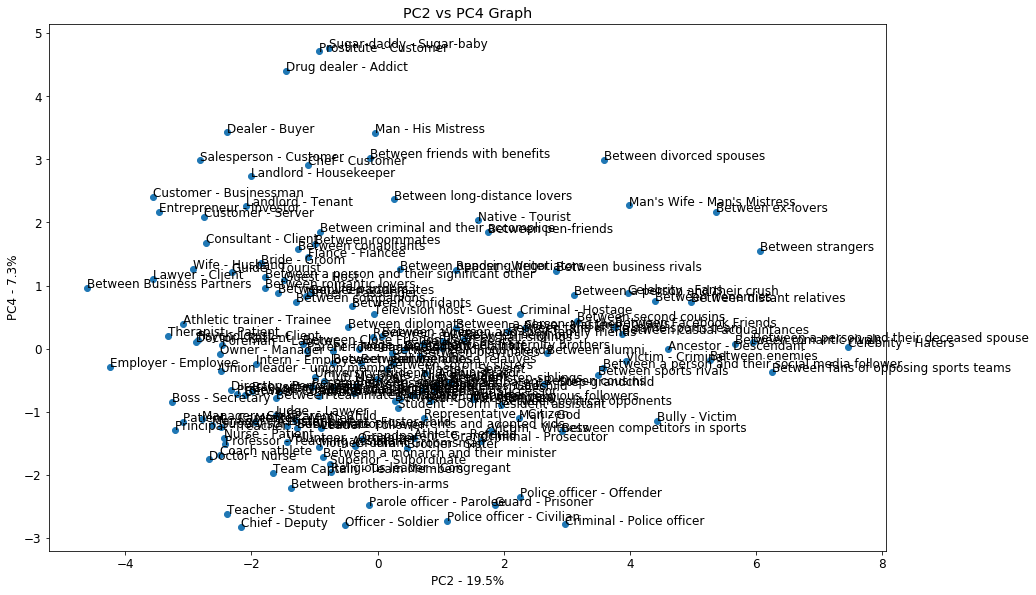

In [13]:
%matplotlib inline
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(15,15))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PC1 vs PC2 Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
# Scatter plot axes need to have an equal aspect, as PCs explain different amounts of variances
# and that should be represented in the visualization of the results
plt.gca().set_aspect('equal')

for sample in pca_df.index:
    plt.annotate(sample.replace('\xe2\x80\x99',"'"), (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.savefig(output_dir+'/pca_scatter_pc1_pc2.png')
plt.show()


plt.figure(figsize=(15,15))
plt.scatter(pca_df.PC3, pca_df.PC4)
plt.title('PC3 vs PC4 Graph')
plt.xlabel('PC3 - {0}%'.format(per_var[2]))
plt.ylabel('PC4 - {0}%'.format(per_var[3]))
plt.gca().set_aspect('equal')

for sample in pca_df.index:
    plt.annotate(sample.replace('\xe2\x80\x99',"'"), (pca_df.PC3.loc[sample], pca_df.PC4.loc[sample]))

plt.savefig(output_dir+'/pca_scatter_pc3_pc4.png')
plt.show()


plt.figure(figsize=(15,15))
plt.scatter(pca_df.PC1, pca_df.PC3)
plt.title('PC1 vs PC3 Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC3 - {0}%'.format(per_var[2]))
plt.gca().set_aspect('equal')

for sample in pca_df.index:
    plt.annotate(sample.replace('\xe2\x80\x99',"'"), (pca_df.PC1.loc[sample], pca_df.PC3.loc[sample]))

plt.savefig(output_dir+'/pca_scatter_pc1_pc3.png')
plt.show()


plt.figure(figsize=(15,15))
plt.scatter(pca_df.PC2, pca_df.PC4)
plt.title('PC2 vs PC4 Graph')
plt.xlabel('PC2 - {0}%'.format(per_var[1]))
plt.ylabel('PC4 - {0}%'.format(per_var[3]))
plt.gca().set_aspect('equal')

for sample in pca_df.index:
    plt.annotate(sample.replace('\xe2\x80\x99',"'"), (pca_df.PC2.loc[sample], pca_df.PC4.loc[sample]))

plt.savefig(output_dir+'/pca_scatter_pc2_pc4.png')
plt.show()


## Names for components:
PC1 - Emotional proximity (intensity?), Communality, social contractness

PC2 - Exchange opportunity

PC3 - Valence

PC4 - Monetary exchange


## PCA with Wish 1976 relationships

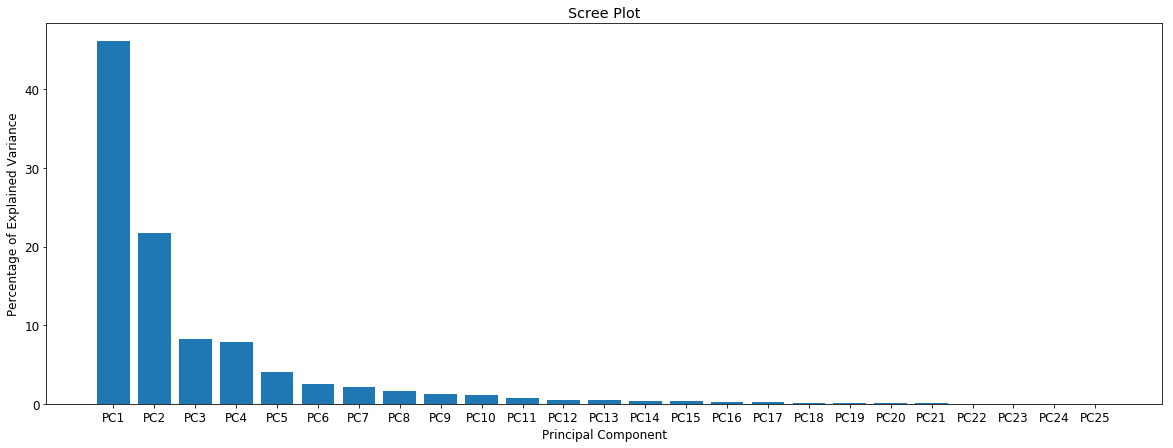

<Figure size 432x288 with 0 Axes>

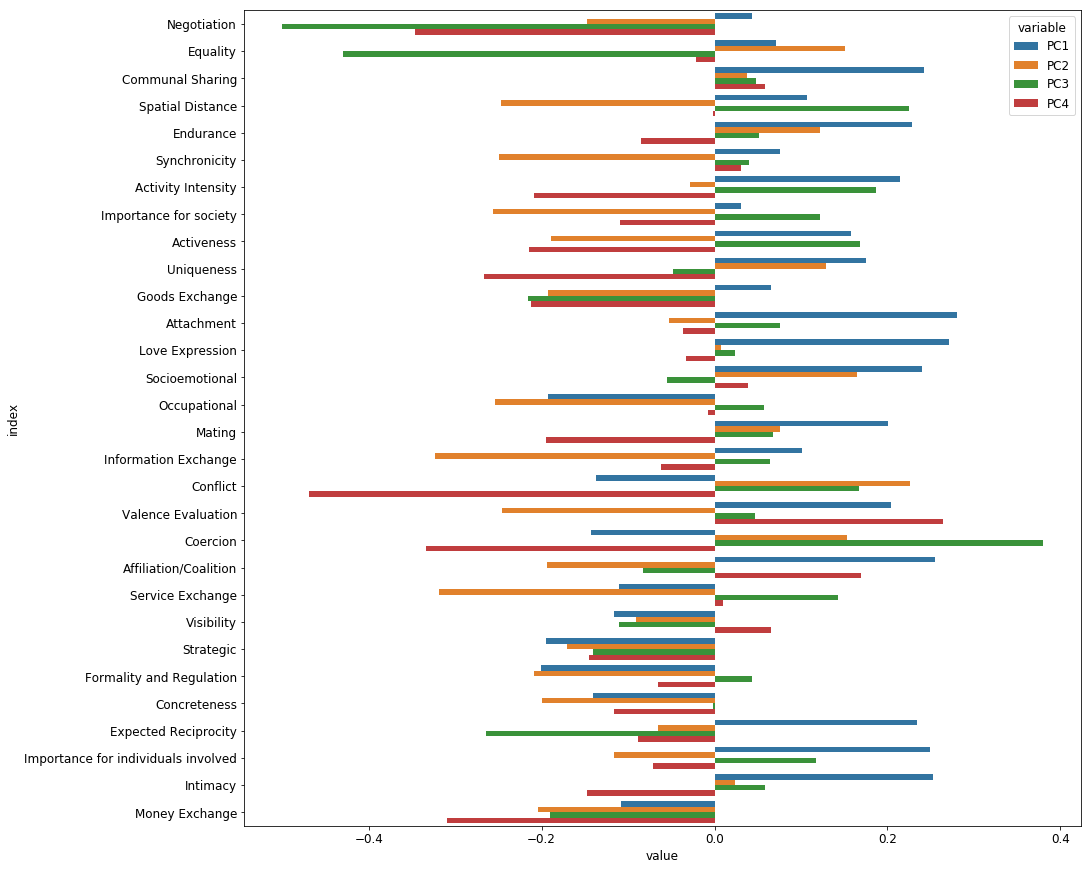

In [14]:
dim_rel_wish_scaled_df = dim_rel_scaled_df.filter(items=survey_1_rel, axis='index')


# Create PCA object and fit
#   Do all the PCA math like calculate loading scores and the variation of each component
pca_wish = PCA()
pca_wish.fit(dim_rel_wish_scaled_df)

# Generate coordinates
pca_wish_data = pca_wish.transform(dim_rel_wish_scaled_df)


# Scree plot
per_var_wish = np.round(pca_wish.explained_variance_ratio_*100, decimals=1)
labels_wish = ['PC' + str(x) for x in range(1, len(per_var_wish)+1)]
plt.figure(figsize=(20,7))
plt.bar(x=range(1,len(per_var_wish)+1), height=per_var_wish, tick_label=labels_wish)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
plt.savefig(output_dir+'/pca_screeplot_wish.png')

pca_wish_df = pd.DataFrame(pca_wish_data, columns=labels_wish, index=survey_1_rel)


# Look at the loading scores
loading_scores_wish = pd.DataFrame(pca_wish.components_.T, columns=pca_wish_df.columns, index=dimension_frames_outliers.keys())
loading_scores_wish.to_csv(output_dir+'/pca_loading_scores_wish.csv')


pca_plot_data_wish = pd.melt(loading_scores_wish[['PC1','PC2','PC3','PC4']].reset_index(), id_vars='index')

plt.figure(figsize=(15,15))
sns.barplot(x='value', y='index', hue='variable', data=pca_plot_data_wish)
plt.savefig(output_dir+'/pca_loadings_wish.png')

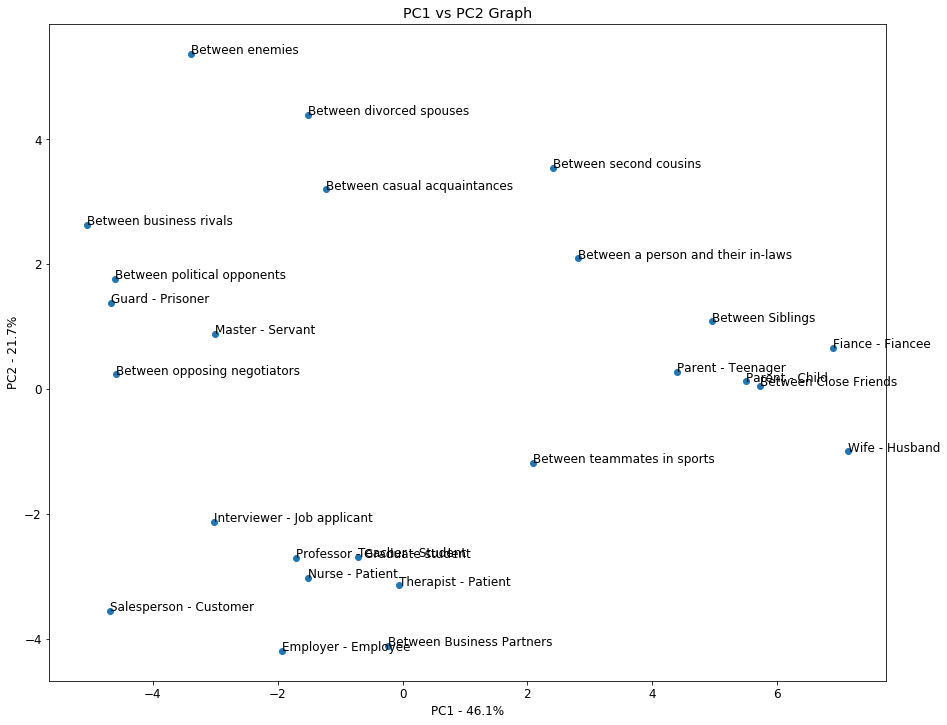

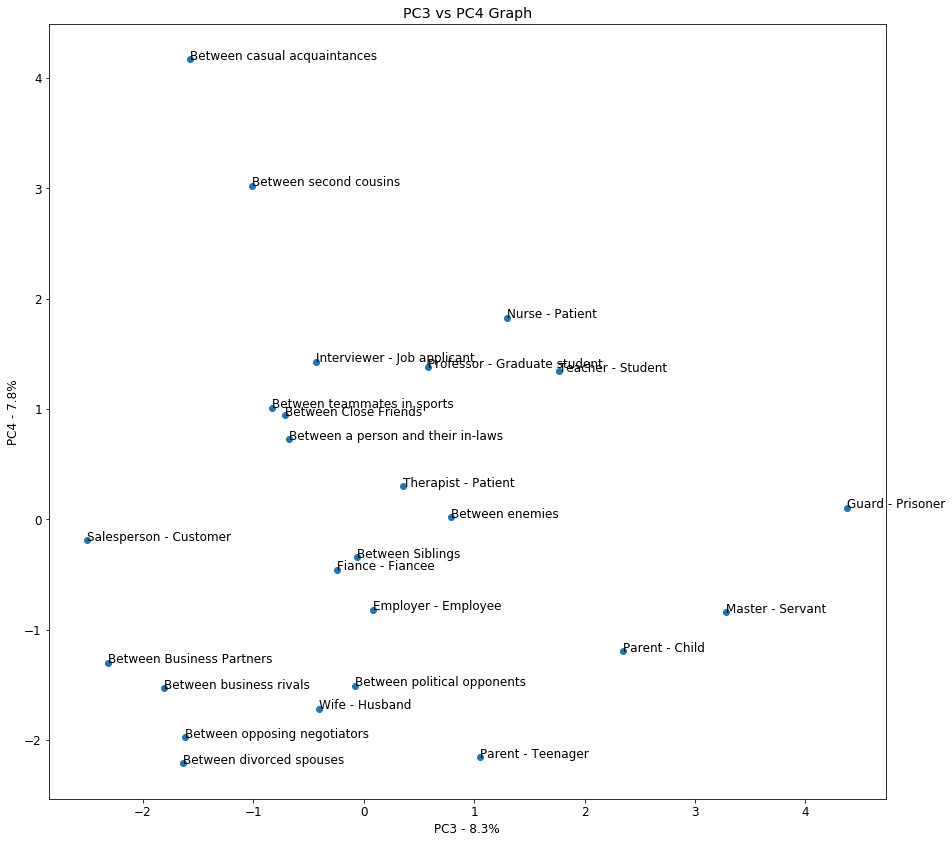

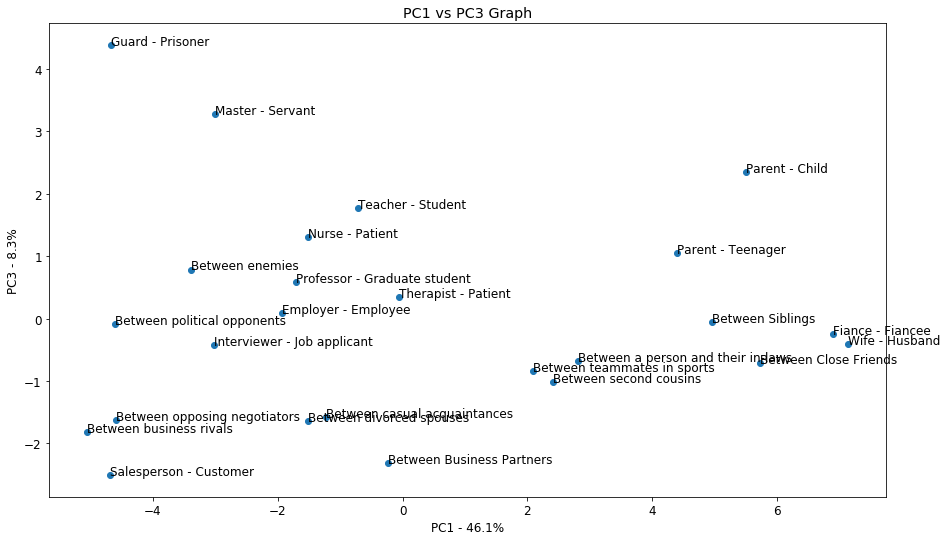

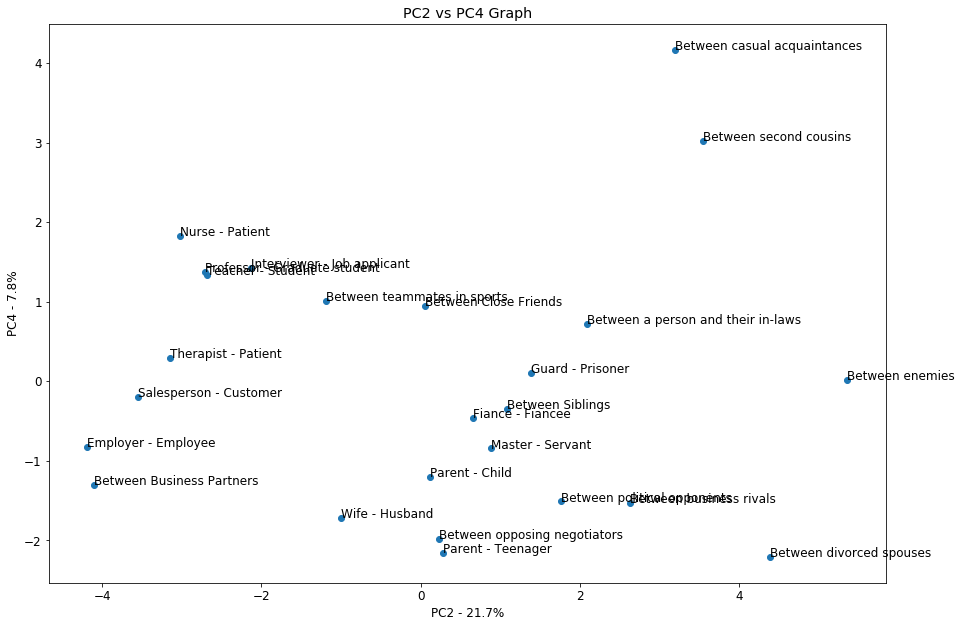

In [15]:
%matplotlib inline
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(15,15))
plt.scatter(pca_wish_df.PC1, pca_wish_df.PC2)
plt.title('PC1 vs PC2 Graph')
plt.xlabel('PC1 - {0}%'.format(per_var_wish[0]))
plt.ylabel('PC2 - {0}%'.format(per_var_wish[1]))
# Scatter plot axes need to have an equal aspect, as PCs explain different amounts of variances
# and that should be represented in the visualization of the results
plt.gca().set_aspect('equal')

for sample in pca_wish_df.index:
    plt.annotate(sample.replace('\xe2\x80\x99',"'"), (pca_wish_df.PC1.loc[sample], pca_wish_df.PC2.loc[sample]))

plt.savefig(output_dir+'/pca_wish_scatter_pc1_pc2.png')
plt.show()


plt.figure(figsize=(15,15))
plt.scatter(pca_wish_df.PC3, pca_wish_df.PC4)
plt.title('PC3 vs PC4 Graph')
plt.xlabel('PC3 - {0}%'.format(per_var_wish[2]))
plt.ylabel('PC4 - {0}%'.format(per_var_wish[3]))
plt.gca().set_aspect('equal')

for sample in pca_wish_df.index:
    plt.annotate(sample.replace('\xe2\x80\x99',"'"), (pca_wish_df.PC3.loc[sample], pca_wish_df.PC4.loc[sample]))

plt.savefig(output_dir+'/pca_wish_scatter_pc3_pc4.png')
plt.show()


plt.figure(figsize=(15,15))
plt.scatter(pca_wish_df.PC1, pca_wish_df.PC3)
plt.title('PC1 vs PC3 Graph')
plt.xlabel('PC1 - {0}%'.format(per_var_wish[0]))
plt.ylabel('PC3 - {0}%'.format(per_var_wish[2]))
plt.gca().set_aspect('equal')

for sample in pca_wish_df.index:
    plt.annotate(sample.replace('\xe2\x80\x99',"'"), (pca_wish_df.PC1.loc[sample], pca_wish_df.PC3.loc[sample]))

plt.savefig(output_dir+'/pca_wish_scatter_pc1_pc3.png')
plt.show()


plt.figure(figsize=(15,15))
plt.scatter(pca_wish_df.PC2, pca_wish_df.PC4)
plt.title('PC2 vs PC4 Graph')
plt.xlabel('PC2 - {0}%'.format(per_var_wish[1]))
plt.ylabel('PC4 - {0}%'.format(per_var_wish[3]))
plt.gca().set_aspect('equal')

for sample in pca_wish_df.index:
    plt.annotate(sample.replace('\xe2\x80\x99',"'"), (pca_wish_df.PC2.loc[sample], pca_wish_df.PC4.loc[sample]))

plt.savefig(output_dir+'/pca_wish_scatter_pc2_pc4.png')
plt.show()

In [16]:
# Get relationships in top and bottom 15th percentile for each PC
top_rels = []
top_rels_df = pd.DataFrame()
pca_df['top_PC1'] = 0
pca_df['top_PC2'] = 0
pca_df['top_PC3'] = 0
pca_df['top_PC4'] = 0
for pc in ['PC1','PC2','PC3','PC4']:
    #print pca_df.nlargest(12, pc).index.tolist()
    pca_df.at[pca_df.nlargest(12, pc).index.tolist(),'top_'+pc] = 1
    pca_df.at[pca_df.nsmallest(12, pc).index.tolist(),'top_'+pc] = 1
    #print pca_df['top_PC1']
    top_rels = top_rels + pca_df[pc].sort_values().head(12).index.tolist()
    top_rels = top_rels + pca_df[pc].sort_values().tail(12).index.tolist()
    #top_rels_df[pc] = pca_df[pc].sort_values().head(12)
    top_rels_df = pd.concat([top_rels_df, pca_df.sort_values(pc)[['PC1','PC2','PC3','PC4']].head(8)], sort=False)
    top_rels_df = pd.concat([top_rels_df, pca_df.sort_values(pc)[['PC1','PC2','PC3','PC4']].tail(8)], sort=False)
    #top_rels_df[pc] = top_rels_df[pc].append(pca_df[pc].sort_values().tail(12))
top_rels_df = top_rels_df.drop_duplicates()
top_rels_df.to_csv(output_dir+'/top_10pc_relationships.csv')
pca_df.to_csv(output_dir+'/pca_relationships.csv')
top_rels_list = list(set(top_rels))

#print top_rels_df


## Raw Dimension Data Comparison of Study 2 Components
The components that were found from the PCA analysis of study 2 were theoritical dimensions in the current study. 

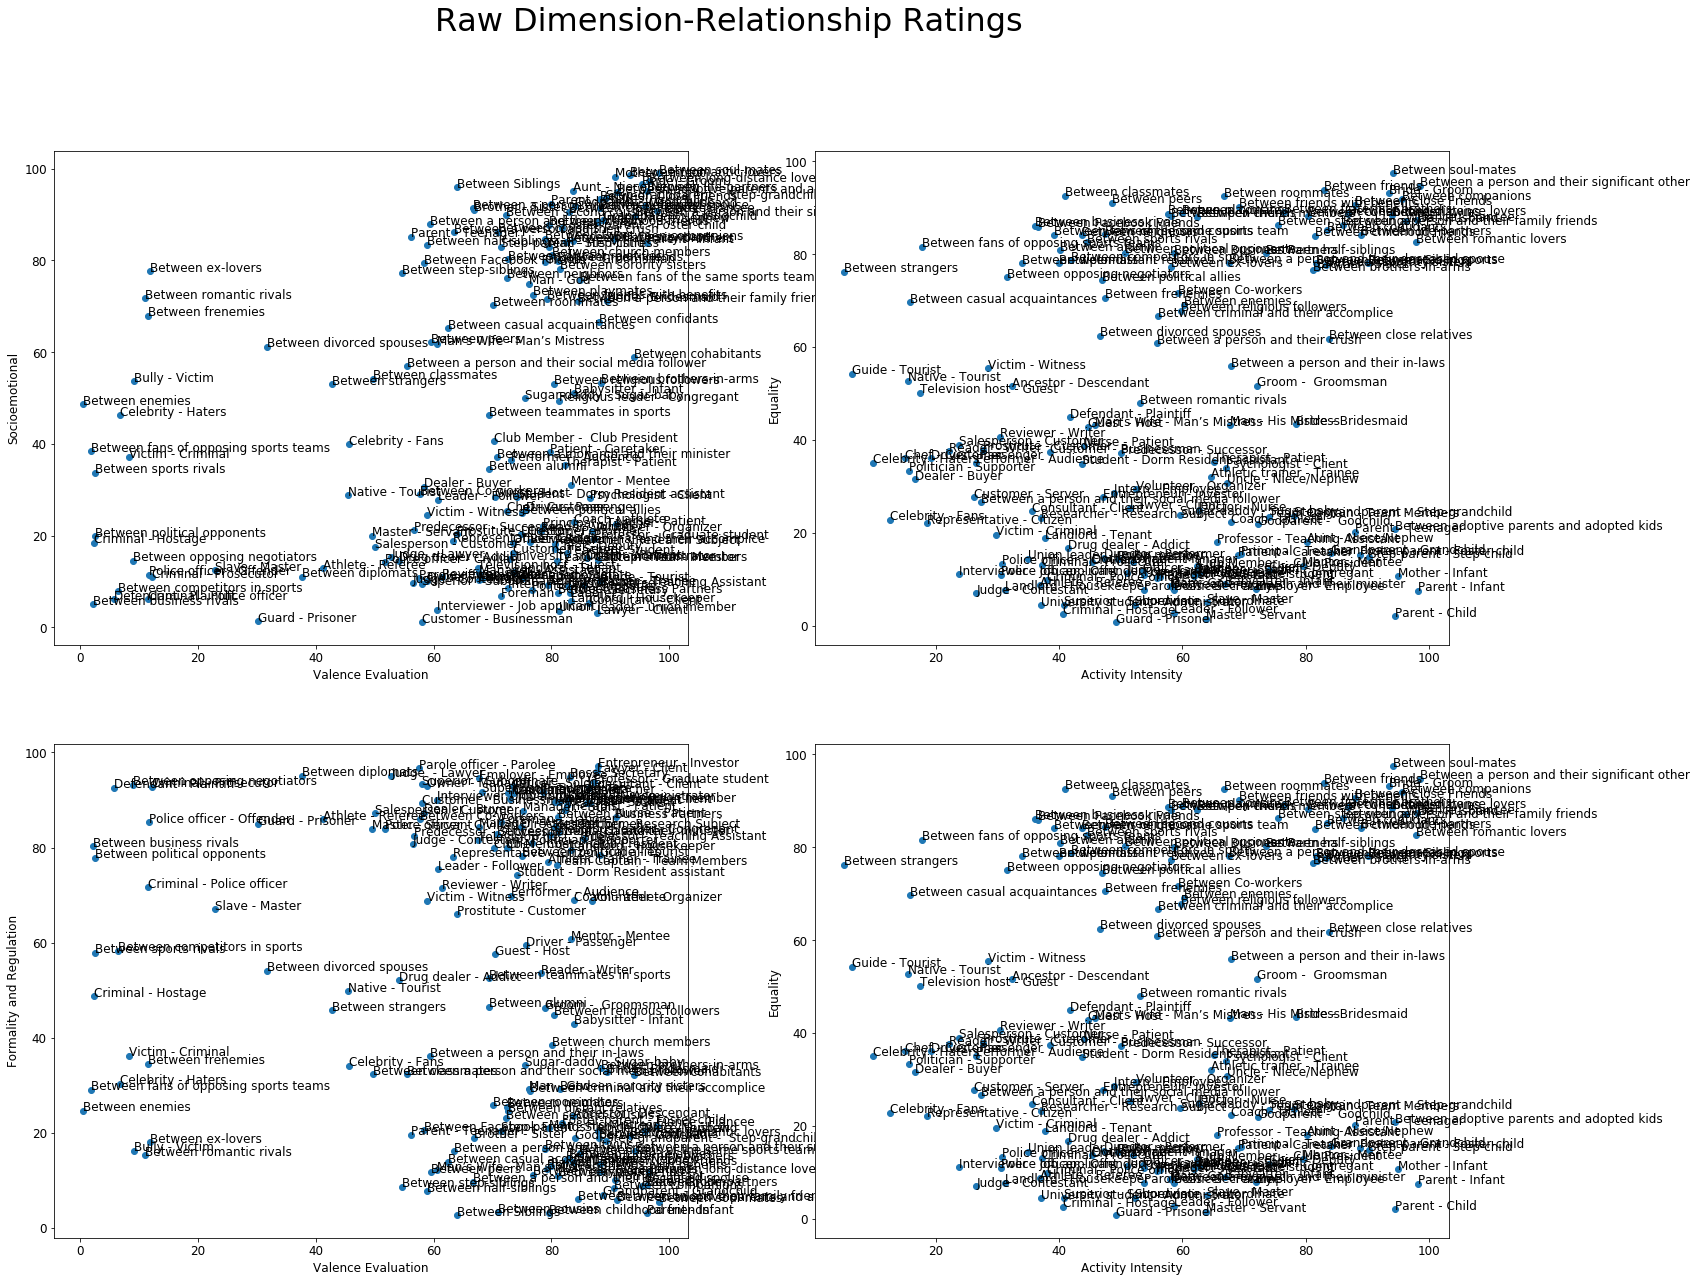

In [29]:
dim_rel_t = dim_rel.T


f, axes = plt.subplots(2, 2, figsize=(25, 20))
plt.rcParams.update({'font.size': 12})

axes[0,0].scatter(dim_rel_t['Valence Evaluation'], dim_rel_t['Socioemotional'])
for sample in dim_rel_t.index:
    axes[0,0].annotate(sample.decode('utf-8'), (dim_rel_t['Valence Evaluation'].loc[sample], dim_rel_t['Socioemotional'].loc[sample]))

axes[0,1].scatter(dim_rel_t['Activity Intensity'], dim_rel_t['Equality'])
for sample in dim_rel_t.index:
    axes[0,1].annotate(sample.decode('utf-8'), (dim_rel_t['Activity Intensity'].loc[sample], dim_rel_t['Equality'].loc[sample]))

axes[1,0].scatter(dim_rel_t['Valence Evaluation'], dim_rel_t['Formality and Regulation'])
for sample in dim_rel_t.index:
    axes[1,0].annotate(sample.decode('utf-8'), (dim_rel_t['Valence Evaluation'].loc[sample], dim_rel_t['Formality and Regulation'].loc[sample]))

axes[1,1].scatter(dim_rel_t['Activity Intensity'], dim_rel_t['Equality'])
for sample in dim_rel_t.index:
    axes[1,1].annotate(sample.decode('utf-8'), (dim_rel_t['Activity Intensity'].loc[sample], dim_rel_t['Equality'].loc[sample]))
   

f.suptitle('Raw Dimension-Relationship Ratings',fontsize=32)
#axes[0,0].set_title('Greedy Subsample',fontsize=24)
#axes[0,1].set_title('Excluded Subsample',fontsize=24)
axes[0,0].set(xlabel='Valence Evaluation', ylabel='Socioemotional')
axes[0,1].set(xlabel='Activity Intensity', ylabel='Equality')
axes[1,0].set(xlabel='Valence Evaluation', ylabel='Formality and Regulation')
axes[1,1].set(xlabel='Activity Intensity', ylabel='Equality')
plt.show()

f.savefig(output_dir+'/raw_dim_scatter_study2pcs.png')


### Correlate study 2 components and raw dimension ratings from study 3

In [88]:
from scipy.stats.stats import pearsonr

pca_df_study2 = pd.read_csv('../wish_replication_all_relationships/results/pca_relationships.csv', index_col=0)
dim_rel_t_study2_rels = dim_rel_t.copy()

# Remove relationships that were added between study 2 and study 3
dim_rel_t_study2_rels = dim_rel_t_study2_rels.drop(['Between cohabitants','Between long-distance lovers','Between brothers-in-arms'])


print('PC1 - Valence Evaluation: '+str(pearsonr(pca_df_study2['PC1'], dim_rel_t_study2_rels['Valence Evaluation'])))
print('PC2 - Socioemotional: '+str(pearsonr(pca_df_study2['PC2'], dim_rel_t_study2_rels['Socioemotional'])))
print('PC2 - Formality and Regulation: '+str(pearsonr(pca_df_study2['PC2'], dim_rel_t_study2_rels['Formality and Regulation'])))
print('PC3 - Activity Intensity: '+str(pearsonr(pca_df_study2['PC3'], dim_rel_t_study2_rels['Activity Intensity'])))
print('PC4 - Equality: '+str(pearsonr(pca_df_study2['PC4'], dim_rel_t_study2_rels['Equality'])))


PC1 - Valence Evaluation: (-0.7971036420066644, 1.4676564662673604e-35)
PC2 - Socioemotional: (0.6227005571250952, 4.00031874442952e-18)
PC2 - Formality and Regulation: (-0.7471814733788481, 4.056812810759209e-29)
PC3 - Activity Intensity: (-0.4338348947448091, 1.534338387058165e-08)
PC4 - Equality: (-0.4844748073934069, 1.4719813434101427e-10)


## Relationships in the top and bottom 15th percentile for each PC

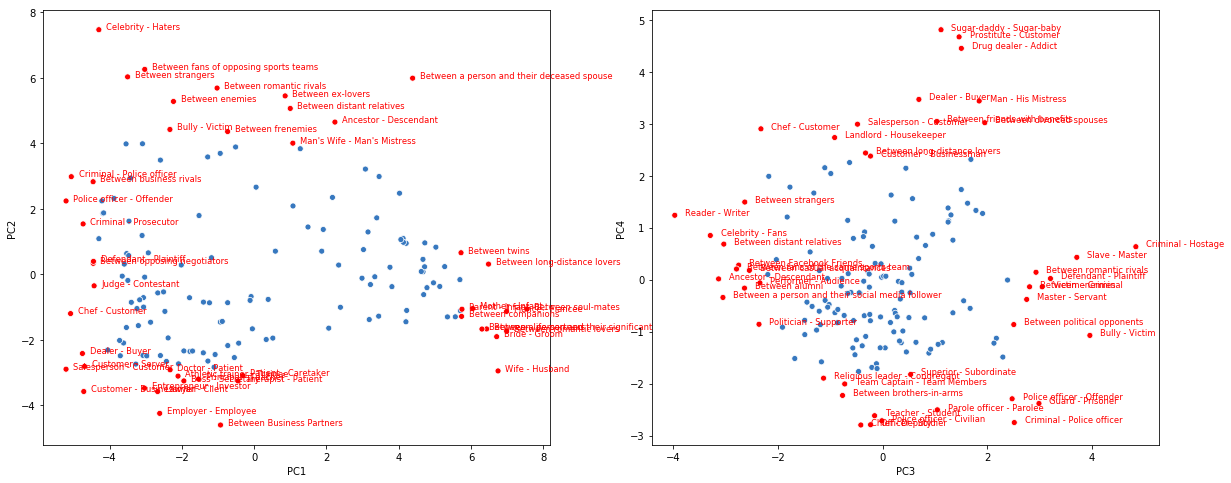

In [14]:

pca_df['top_rels'] = 0
pca_df.at[top_rels_df.index.tolist(),'top_rels'] = 1

top12_rels = pca_df.loc[np.logical_or(pca_df.top_PC1 == 1, pca_df.top_PC2 == 1)].index.tolist()
top34_rels = pca_df.loc[np.logical_or(pca_df.top_PC3 == 1, pca_df.top_PC4 == 1)].index.tolist()

pca_df['top_PC12'] = 0
pca_df['top_PC34'] = 0
pca_df.at[top12_rels,'top_PC12'] = 1
pca_df.at[top34_rels,'top_PC34'] = 1

%matplotlib inline
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(20, 8))
p1 = sns.scatterplot(x="PC1", y="PC2", hue='top_PC12', data=pca_df, ax=ax1,
                     palette = sns.color_palette(palette = [sns.xkcd_rgb["windows blue"] , "red"]),
                     legend=False)
p2 = sns.scatterplot(x="PC3", y="PC4", hue='top_PC34', data=pca_df, ax=ax2,
                     palette = sns.color_palette(palette = [sns.xkcd_rgb["windows blue"] , "red"]),
                     legend=False)

for rel in top12_rels:
    p1.text(pca_df.PC1[rel]+0.2, 
            pca_df.PC2[rel], 
            rel.replace('\xe2\x80\x99',"'"),
            horizontalalignment='left', size='small', color='red')
for rel in top34_rels:
    p2.text(pca_df.PC3[rel]+0.2, 
            pca_df.PC4[rel], 
            rel.replace('\xe2\x80\x99',"'"),
            horizontalalignment='left', size='small', color='red')
fig.savefig(output_dir+'/top_rels_scatter.png')



# MDS
## MDS Scatterplots

In [15]:
seed = np.random.RandomState(seed=1)

mds = manifold.MDS(n_components=4, max_iter=3000, eps=1e-9, random_state=seed,
                   n_jobs=1)
pos = mds.fit(dim_rel_scaled).embedding_

nmds = manifold.MDS(n_components=4, metric=False, max_iter=3000, eps=1e-12,
                    random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(dim_rel_scaled, init=pos)


# Rotate the data
clf = PCA(n_components=4)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)





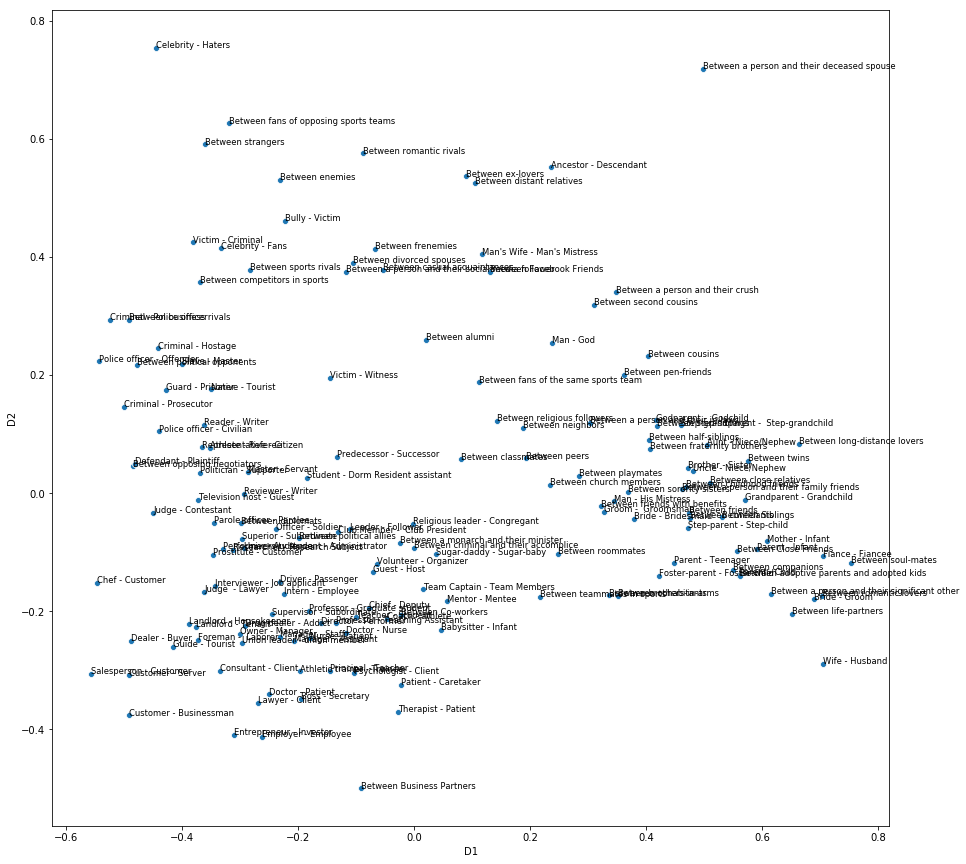

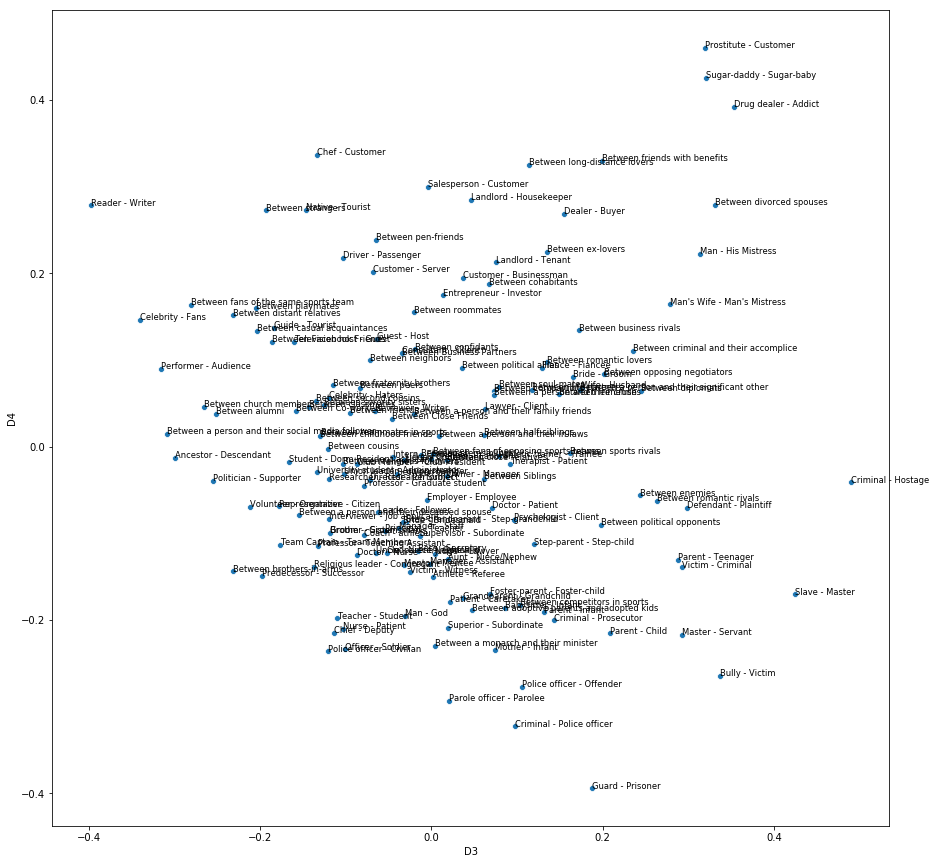

In [16]:
# Plot the MDS data
npos_df = pd.DataFrame(npos, columns=['D1','D2','D3','D4'], index=relationships)
npos_df['old_new_comp'] = 0
npos_df.iloc[0:26,-1] = 1

# Load survey 1 data and relationships to compare to all relationships analysis
survey_1_pca_df = pd.read_csv('../wish_replication/results/pca_relationships.csv',
                              index_col=0)
survey_1_pca_df['PC1'] = survey_1_pca_df['PC1']*-1

# Plot all relationships
%matplotlib inline
plt.figure(figsize=(15,15))
p1 = sns.scatterplot(x="D1", y="D2", data=npos_df, legend=False)
for line in range(0,159):
     p1.text(npos_df.D1[line], npos_df.D2[line], npos_df.index[line].replace('\xe2\x80\x99',"'"),
             horizontalalignment='left', size='small')
plt.savefig(output_dir+'/mds_scatter_d1_d2.png')

plt.figure(figsize=(15,15))
p1 = sns.scatterplot(x="D3", y="D4", data=npos_df, legend=False)
for line in range(0,159):
     p1.text(npos_df.D3[line], npos_df.D4[line], npos_df.index[line].replace('\xe2\x80\x99',"'"),
             horizontalalignment='left', size='small')
plt.savefig(output_dir+'/mds_scatter_d3_d4.png')


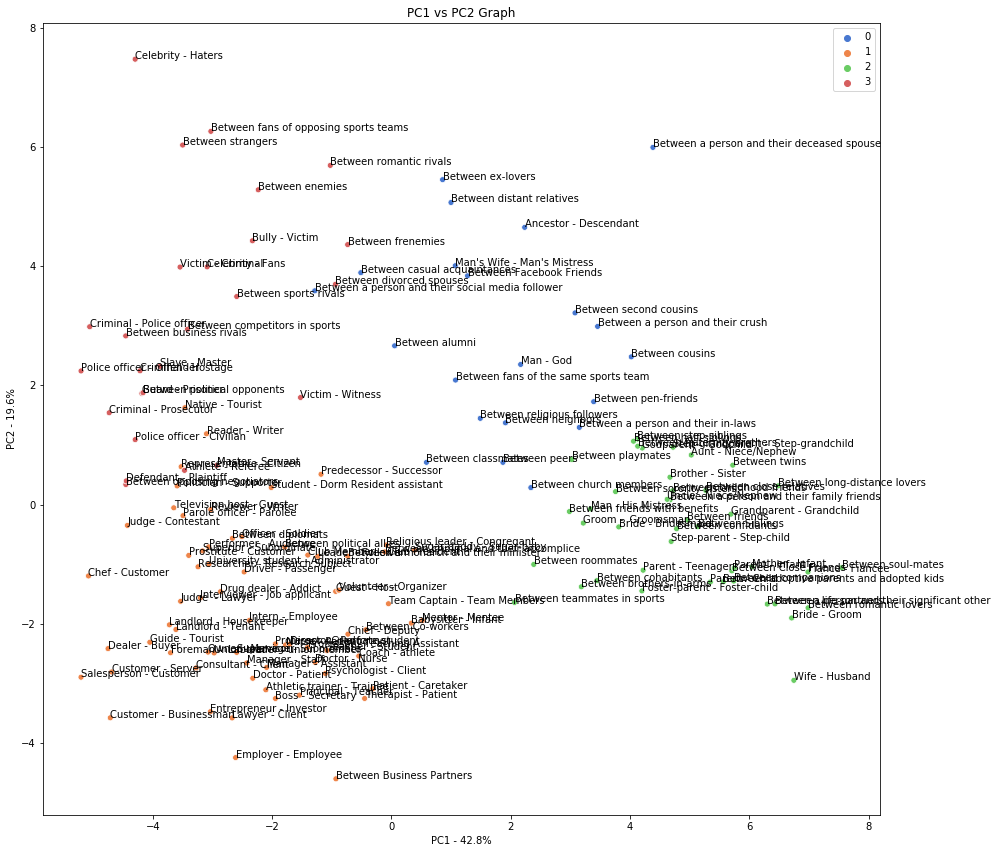

In [17]:
from sklearn.cluster import KMeans

pca_df_raw = pca_df[pca_df.columns[:-9]]


kmeans = KMeans(n_clusters=4)
kmeans.fit(pca_df_raw)
y_km = kmeans.fit_predict(pca_df_raw)

plt.figure(figsize=(15,15))
sns.scatterplot(pca_df_raw.PC1, pca_df_raw.PC2, hue=y_km, palette=sns.color_palette("muted")[:4])
plt.title('PC1 vs PC2 Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.gca().set_aspect('equal')

for sample in pca_df_raw.index:
    plt.annotate(sample.replace('\xe2\x80\x99',"'"), (pca_df_raw.PC1.loc[sample], pca_df_raw.PC2.loc[sample]))

plt.savefig(output_dir+'/pca_scatter_pc1_pc2_cluster.png')
plt.show()

pca_df_km = pca_df
pca_df_km['clusters'] = y_km
g = pca_df_km.groupby('clusters')


In [18]:
pca_df_km.groupby('clusters').apply(lambda x: x.index.tolist())[2]

['Parent - Child',
 'Parent - Teenager',
 'Wife - Husband',
 'Fiance - Fiancee',
 'Between Siblings',
 'Between Close Friends',
 'Between teammates in sports',
 'Parent - Infant',
 'Grandparent - Grandchild',
 'Step-parent - Step-child',
 'Foster-parent - Foster-child',
 'Godparent -  Godchild',
 'Step-grandparent -  Step-grandchild',
 'Bride - Groom',
 'Man - His Mistress',
 'Brother - Sister',
 'Between step-siblings',
 'Between close relatives',
 'Between twins',
 'Between a person and their family friends',
 'Between roommates',
 'Between sorority sisters',
 'Between fraternity brothers',
 'Bride - Bridesmaid',
 'Groom -  Groomsman',
 'Between friends',
 'Between childhood friends',
 'Between friends with benefits',
 'Between romantic lovers',
 'Between life-partners',
 'Between soul-mates',
 'Aunt - Niece/Nephew',
 'Uncle - Niece/Nephew',
 'Between half-siblings',
 'Between adoptive parents and adopted kids',
 'Mother - Infant',
 'Between confidants',
 'Between a person and their 

## Agglomerative Hierarchical Clustering
# Dendogram
Use dendogram to choose number of clusters

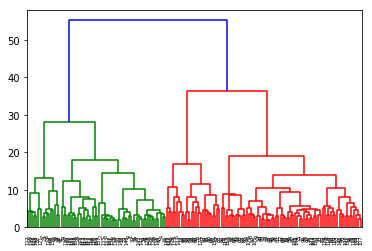

In [19]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(pca_df, method='ward'))


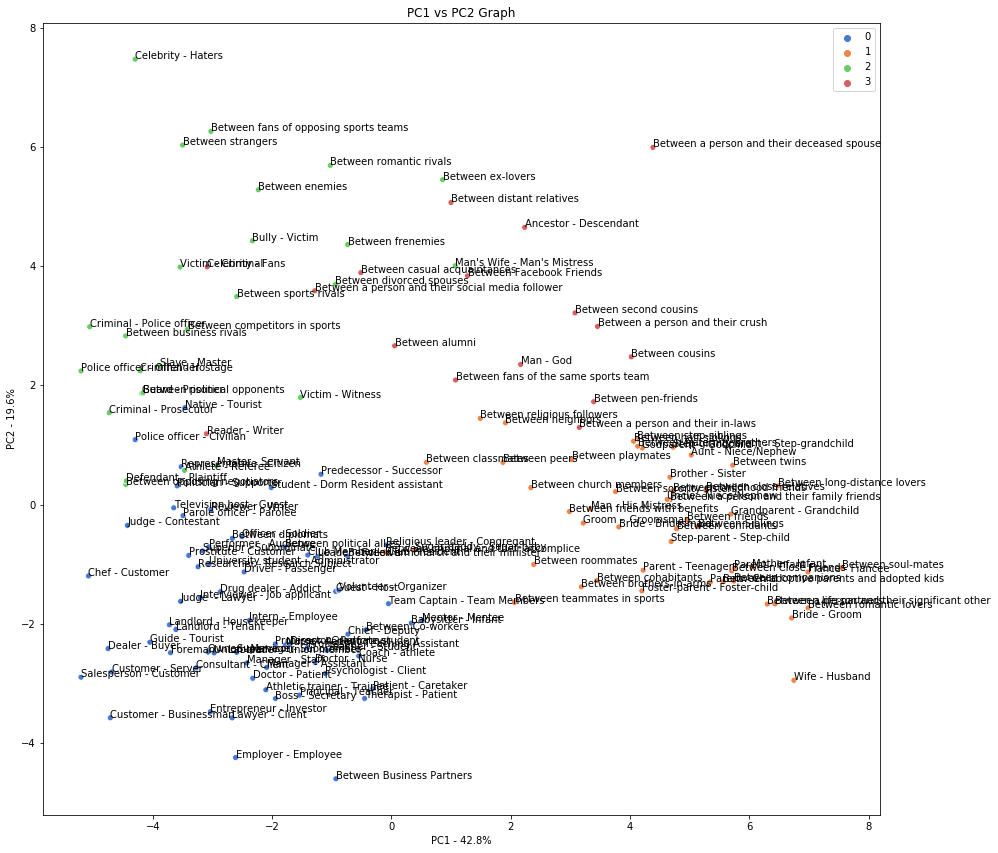

['Parent - Child',
 'Parent - Teenager',
 'Wife - Husband',
 'Fiance - Fiancee',
 'Between Siblings',
 'Between Close Friends',
 'Between teammates in sports',
 'Parent - Infant',
 'Grandparent - Grandchild',
 'Step-parent - Step-child',
 'Foster-parent - Foster-child',
 'Godparent -  Godchild',
 'Step-grandparent -  Step-grandchild',
 'Bride - Groom',
 'Man - His Mistress',
 'Brother - Sister',
 'Between step-siblings',
 'Between close relatives',
 'Between twins',
 'Between a person and their family friends',
 'Between roommates',
 'Between sorority sisters',
 'Between fraternity brothers',
 'Bride - Bridesmaid',
 'Groom -  Groomsman',
 'Between friends',
 'Between childhood friends',
 'Between friends with benefits',
 'Between romantic lovers',
 'Between life-partners',
 'Between soul-mates',
 'Aunt - Niece/Nephew',
 'Uncle - Niece/Nephew',
 'Between half-siblings',
 'Between adoptive parents and adopted kids',
 'Mother - Infant',
 'Between confidants',
 'Between a person and their 

In [20]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(pca_df)


plt.figure(figsize=(15,15))
sns.scatterplot(pca_df_raw.PC1, pca_df_raw.PC2, hue=y_hc, palette=sns.color_palette("muted")[:4])
plt.title('PC1 vs PC2 Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.gca().set_aspect('equal')

for sample in pca_df_raw.index:
    plt.annotate(sample.replace('\xe2\x80\x99',"'"), (pca_df_raw.PC1.loc[sample], pca_df_raw.PC2.loc[sample]))

plt.savefig(output_dir+'/pca_scatter_pc1_pc2_cluster.png')
plt.show()

pca_df_hc = pca_df
pca_df_hc['clusters'] = y_km
g = pca_df_hc.groupby('clusters')


pca_df_hc.groupby('clusters').apply(lambda x: x.index.tolist())[2]

***
# Replicate PCA in R

In [2]:
library(factoextra)
library(lattice)
library(tidyverse)
library(gridExtra)
library(viridis)
library(corrplot)
library(psych)
theme_set(theme_minimal())
theme_update(
text = element_text(size = 20)
)
setwd("~/Google_Drive/olson_lab/projects/relationship_knowledge/surveys/lit_dimensions_all_relationships/")
getwd()

[1] "/Users/tuk12127/Google_Drive/olson_lab/projects/relationship_knowledge/surveys/lit_dimensions_all_relationships"

In [3]:
dim_rel_scaled = read.csv('results/dim_rel_scaled.csv', row.names=1)
#relationships = dim_rel_scaled[1]
#dim_rel_scaled = dim_rel_scaled[,2:31]

pca.res <- prcomp(dim_rel_scaled)
summary(pca.res)

Importance of components:
                          PC1    PC2     PC3     PC4    PC5    PC6     PC7
Standard deviation     3.5932 2.4290 1.53392 1.48947 1.1900 1.0101 0.78531
Proportion of Variance 0.4277 0.1954 0.07794 0.07349 0.0469 0.0338 0.02043
Cumulative Proportion  0.4277 0.6231 0.70104 0.77453 0.8214 0.8552 0.87565
                          PC8     PC9    PC10    PC11    PC12   PC13    PC14
Standard deviation     0.7553 0.65809 0.59313 0.55847 0.52023 0.4854 0.46121
Proportion of Variance 0.0189 0.01435 0.01165 0.01033 0.00896 0.0078 0.00705
Cumulative Proportion  0.8945 0.90890 0.92055 0.93088 0.93984 0.9476 0.95469
                          PC15    PC16    PC17   PC18    PC19    PC20    PC21
Standard deviation     0.43296 0.41575 0.35428 0.3476 0.33629 0.32195 0.29004
Proportion of Variance 0.00621 0.00573 0.00416 0.0040 0.00375 0.00343 0.00279
Cumulative Proportion  0.96090 0.96663 0.97079 0.9748 0.97854 0.98197 0.98476
                         PC22    PC23    PC24    PC25 

In [4]:
pv <- principal(dim_rel_scaled, 4, rotate="varimax")
pv

Principal Components Analysis
Call: principal(r = dim_rel_scaled, nfactors = 4, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
                                      RC1   RC2   RC3   RC4   h2    u2 com
Negotiation                          0.10  0.22  0.08  0.67 0.52 0.481 1.3
Equality                             0.60 -0.20  0.19 -0.02 0.44 0.556 1.5
Communal.Sharing                     0.68  0.28  0.43 -0.43 0.92 0.082 2.9
Spatial.Distance                    -0.03  0.78  0.02  0.18 0.65 0.353 1.1
Endurance                            0.60  0.39  0.40 -0.30 0.76 0.238 3.2
Synchronicity                       -0.05  0.74  0.02  0.22 0.61 0.394 1.2
Activity.Intensity                   0.53  0.73  0.24 -0.17 0.89 0.105 2.2
Importance.for.society              -0.52  0.50  0.20 -0.15 0.58 0.422 2.4
Activeness                           0.21  0.86  0.16  0.19 0.85 0.154 1.3
Uniqueness                           0.65  0.50  0.03 -0.07 0.68 0.320 1.9
Goods.

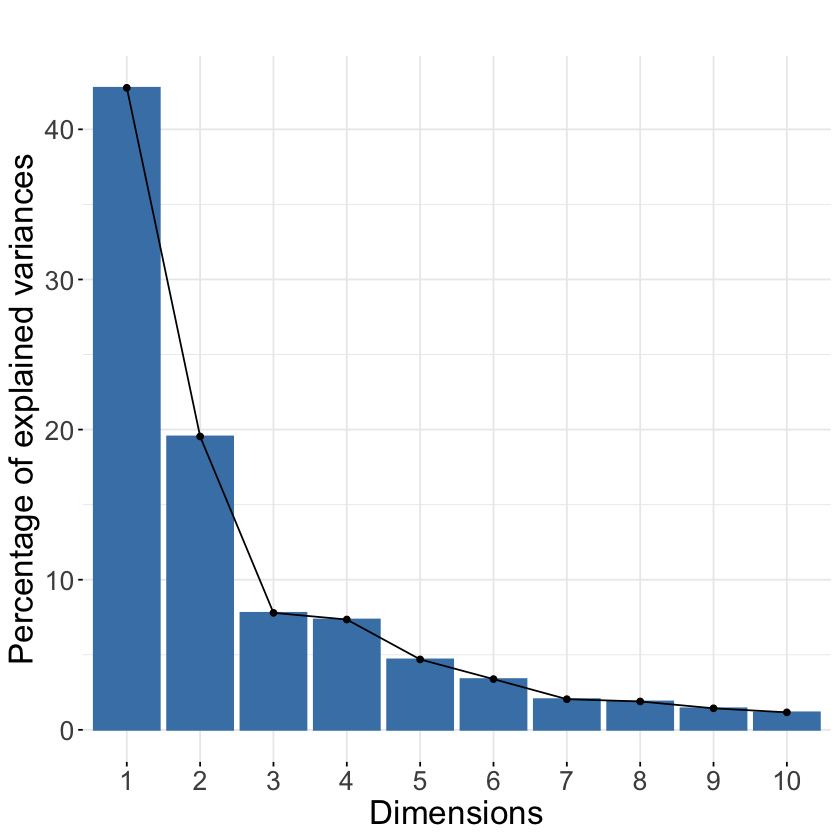

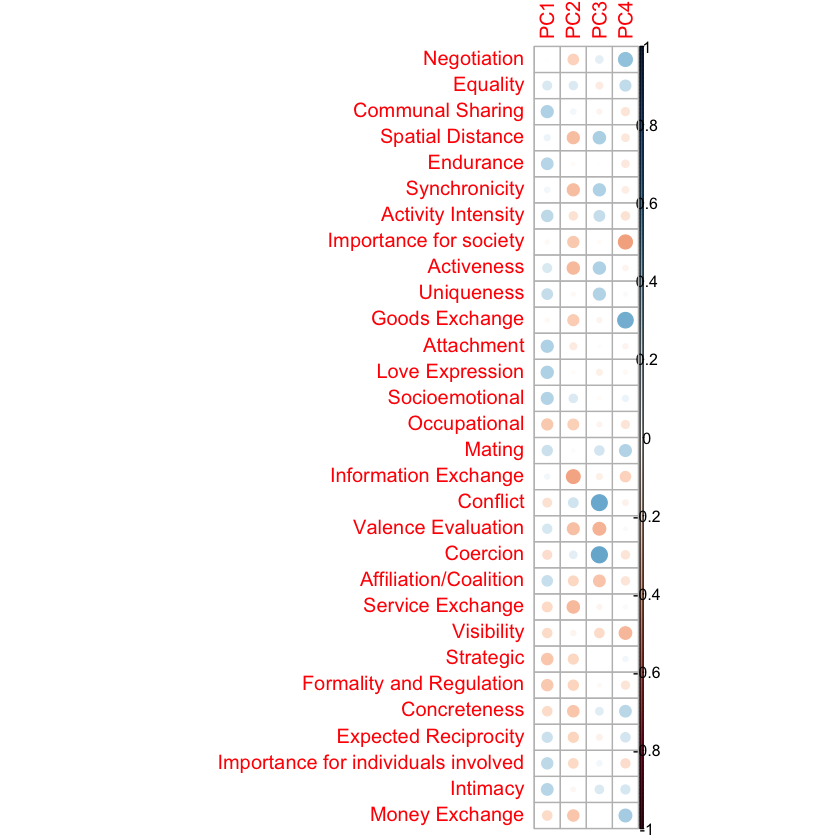

In [5]:
fviz_eig(pca.res) + ggtitle("") +
theme(text = element_text(size = 20))

pca_loadings = read.csv('results/pca_loading_scores.csv', row.names=1)
corrplot(data.matrix(pca_loadings[1:4]))

## Correlation Circle
Arrow lengths indicate loading scores, where the x-value of an arrow is the loading on the x-component

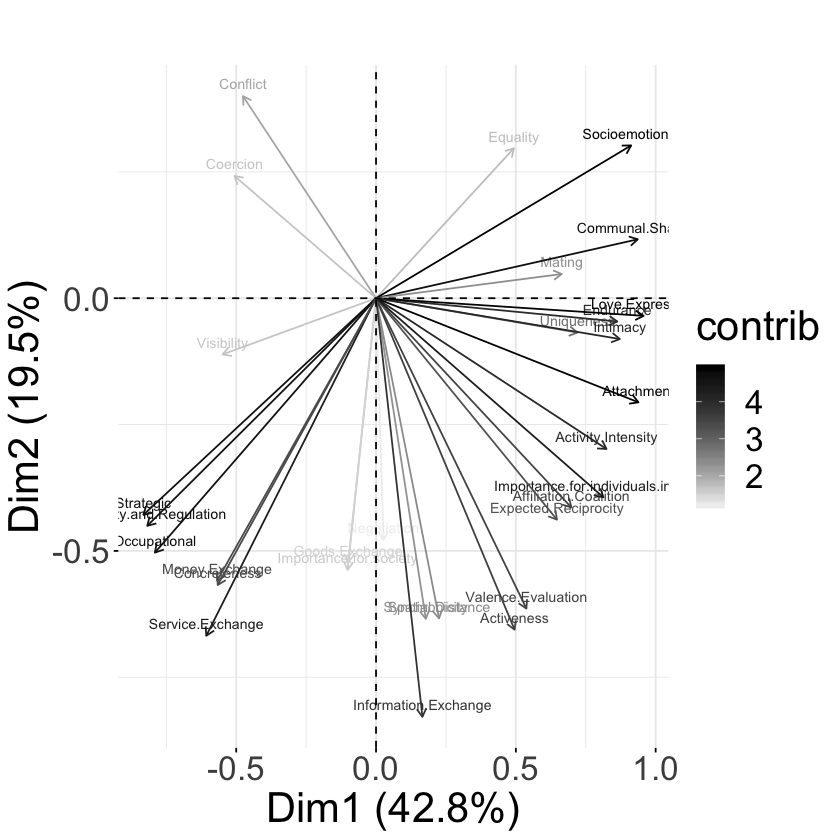

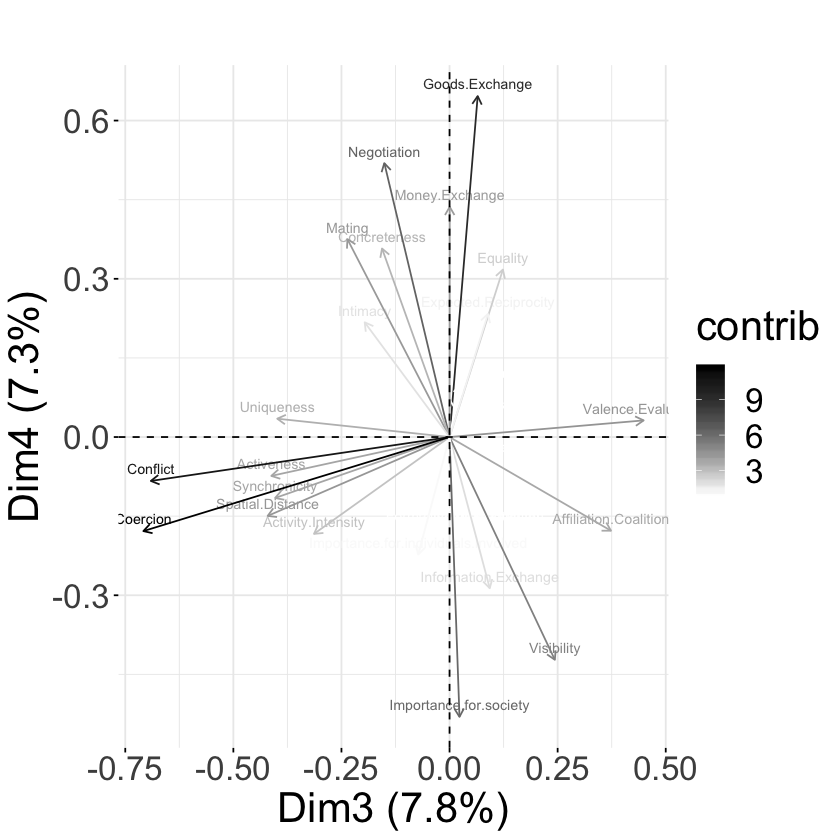

In [6]:
fviz_pca_var(pca.res, labelsize = 3, col.var="contrib") +
    scale_color_gradient2(low="white", mid="white", 
                          high="black", midpoint=1) + 
    ggtitle("") + theme(text = element_text(size = 25))

fviz_pca_var(pca.res, axes=c(3,4), labelsize = 3, col.var="contrib") +
    scale_color_gradient2(low="white", mid="white", 
                          high="black", midpoint=1) + 
    ggtitle("") + theme(text = element_text(size = 25))

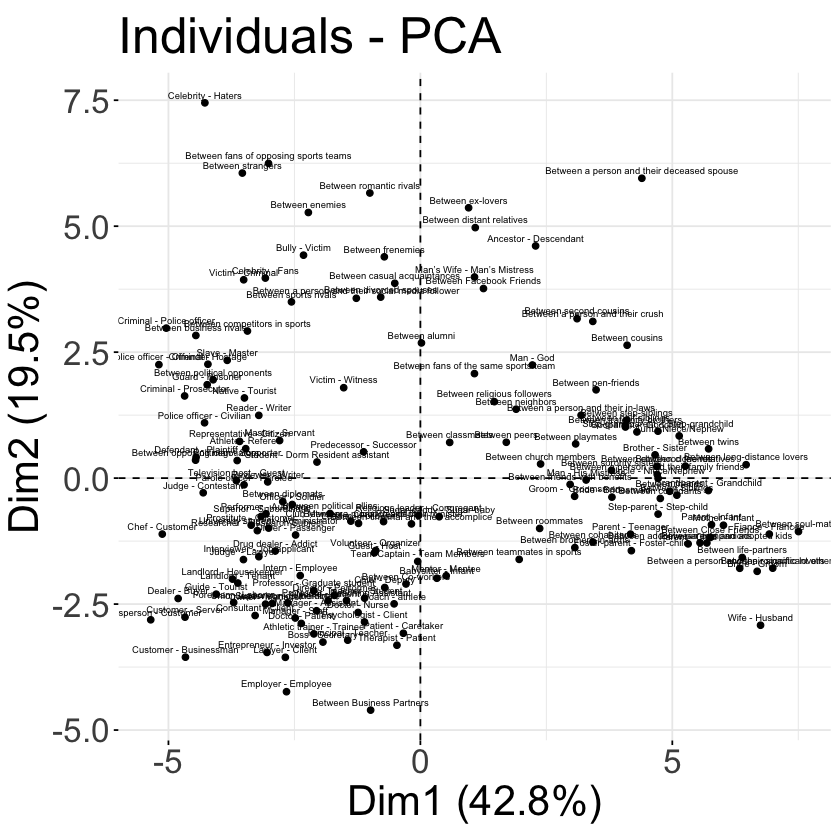

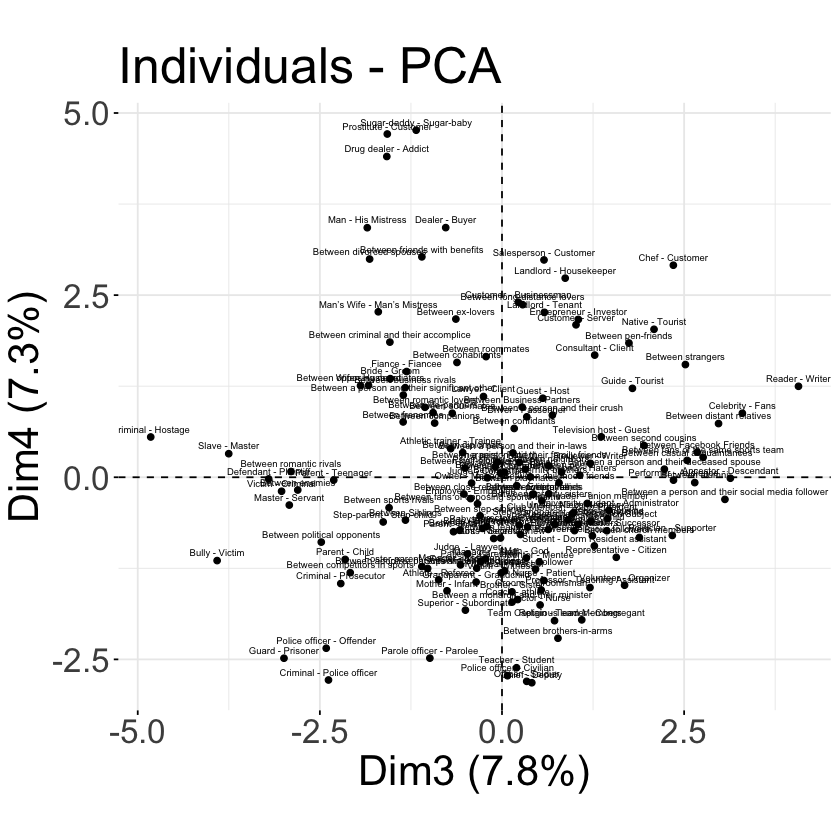

In [7]:
options(warn=-1)

fviz_pca_ind(pca.res, labelsize=2) +
    coord_fixed() + theme(text = element_text(size = 25))

fviz_pca_ind(pca.res, axes=c(3,4), labelsize=2) +
    coord_fixed() + theme(text = element_text(size = 25))

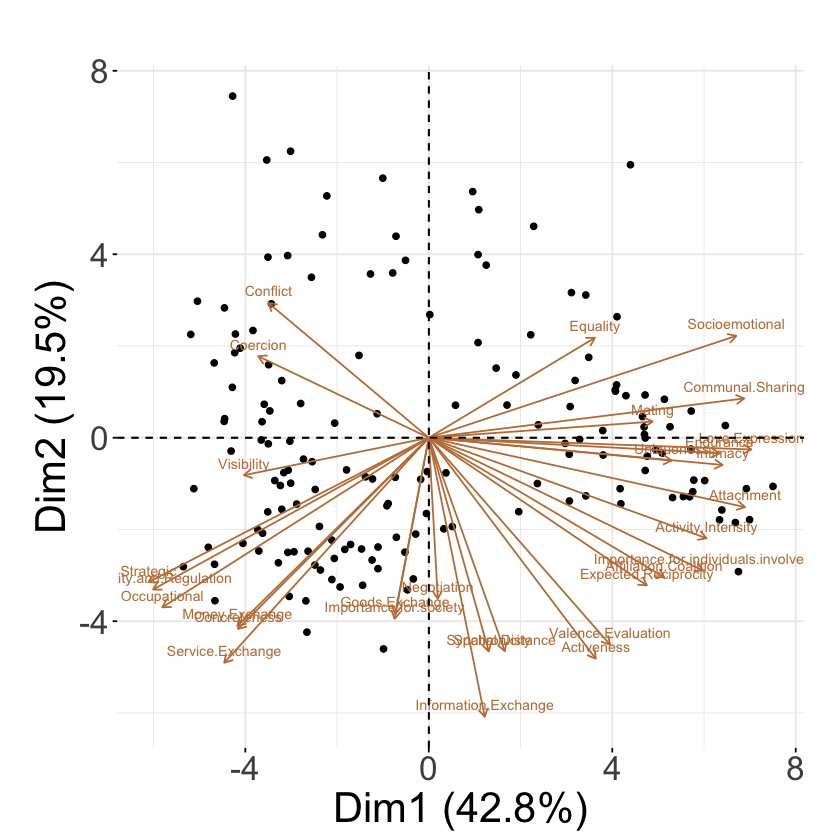

In [8]:
fviz_pca_biplot(pca.res, axes=c(1,2), geom = "point",
labelsize = 3, col.var = "#c07d44") +
coord_fixed() + ggtitle("") +
theme(text = element_text(size = 25))

## Quantitatively selecting the number of components

### Parallel Analysis

Parallel analysis suggests that the number of factors =  NA  and the number of components =  4 


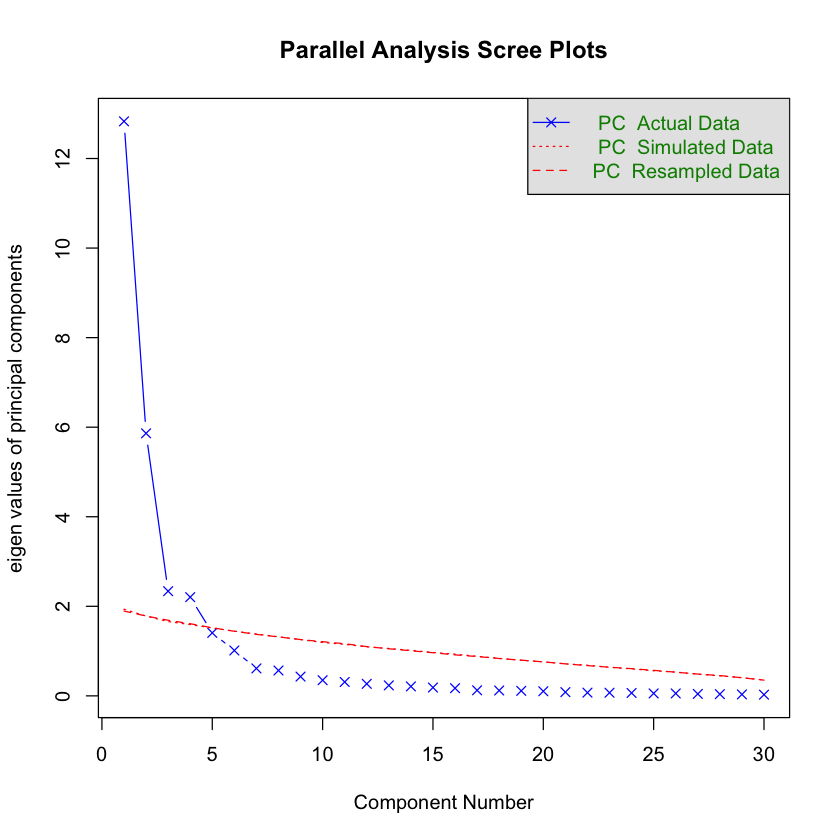

In [9]:
fa.parallel(dim_rel_scaled,fa="pc")


Very Simple Structure
Call: vss(x = x, n = n, rotate = rotate, diagonal = diagonal, fm = fm, 
    n.obs = n.obs, plot = plot, title = title, use = use, cor = cor)
VSS complexity 1 achieves a maximimum of 0.77  with  1  factors
VSS complexity 2 achieves a maximimum of 0.93  with  2  factors

The Velicer MAP achieves a minimum of NA  with  6  factors 
BIC achieves a minimum of  NA  with  7  factors
Sample Size adjusted BIC achieves a minimum of  NA  with  13  factors

Statistics by number of factors 
   vss1 vss2   map dof   chisq     prob sqresid  fit RMSEA  BIC  SABIC complex
1  0.77 0.00 0.126 405 3.9e+03  0.0e+00   49.39 0.77 0.242 1805 3087.5     1.0
2  0.68 0.93 0.065 376 2.4e+03 2.5e-285   15.16 0.93 0.192  462 1652.5     1.4
3  0.69 0.89 0.060 348 1.8e+03 1.9e-192    9.71 0.95 0.171   27 1128.9     1.6
4  0.55 0.85 0.045 321 1.3e+03 9.3e-113    4.92 0.98 0.145 -358  658.1     1.8
5  0.46 0.81 0.038 295 9.7e+02  2.5e-72    2.92 0.99 0.128 -529  404.8     2.0
6  0.50 0.80 0.030 27

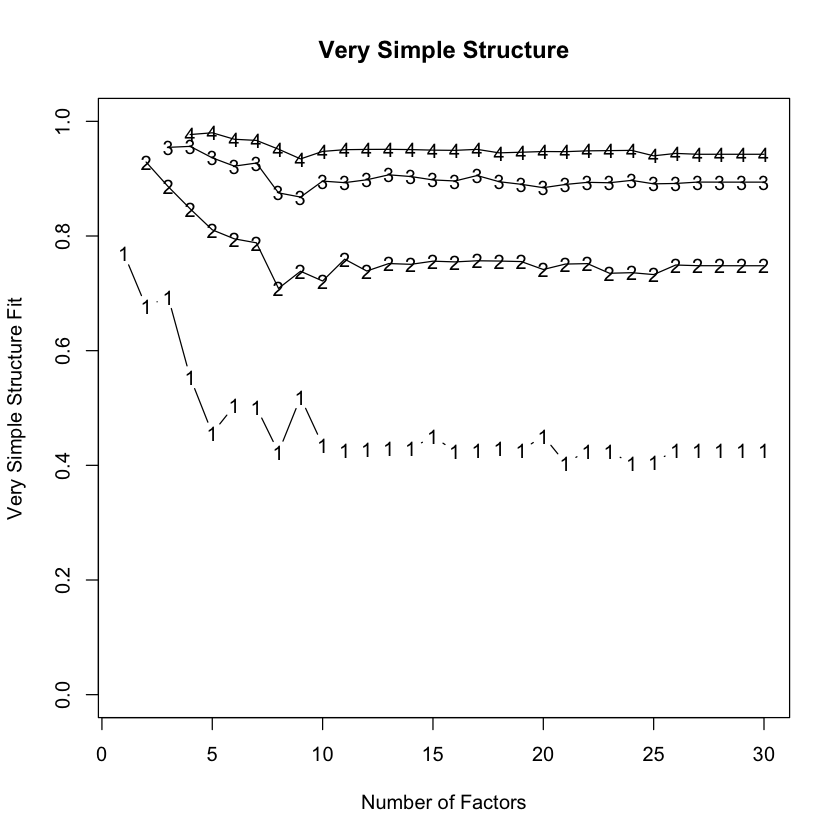

In [17]:
VSS(dim_rel_scaled,30)

In [12]:
help(vss)

### Bi-cross-validation

In [19]:
library(bcv)
set.seed(1)  # set seed to get preproducible results
perf <- matrix(NA,30,10)
# perform 10 iterations to overcome C-V instability
for (i in 1:10){
  bcvfit <- cv.svd.gabriel(dim_rel_scaled)
  perf[,i]<-colMeans(bcvfit$msep)
}
which(rowMeans(perf)==min(rowMeans(perf)))-1 # substract 1 because 0 PCs are considered

ERROR: Error in perf[, i] <- colMeans(bcvfit$msep): number of items to replace is not a multiple of replacement length


In [18]:
install.packages("bcv", dependencies = TRUE)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [20]:
cv.svd.gabriel(dim_rel_scaled)


Call:
cv.svd.gabriel(x = dim_rel_scaled)

  Rank    MSEP        SE
 -----------------------
     0  0.9999  0.015186
     1  0.5988  0.027964
     2  0.4620  0.016085
     3  0.4156  0.017299
     4  0.3677  0.011099
     5  0.3345  0.012220
     6  0.3204  0.012190
     7  0.3147  0.013132
     8  0.3108  0.013049
     9  0.3050  0.006733 + 
    10  0.3029  0.004236
    11  0.2991  0.006085 * 
    12  0.3047  0.005876
    13  0.3063  0.007067
    14  0.3077  0.005723
    15  0.3138  0.006834
